 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = Path("../Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#whale_df.columns
#whale_df.dtypes

columns = ["Soros", "Paulson", "Tiger", "Berkshire"]
whale_df.columns = columns
whale_df.sort_index(inplace=True)
whale_df

Soros   Paulson     Tiger  Berkshire
Date                                               
2015-03-02       NaN       NaN       NaN        NaN
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569
2015-03-04  0.002230  0.003241 -0.002534   0.004213
2015-03-05  0.004016  0.004076  0.002355   0.006726
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098
...              ...       ...       ...        ...
2019-04-25 -0.000285 -0.001291 -0.005153   0.004848
2019-04-26  0.008149  0.009162  0.012355   0.010434
2019-04-29  0.001254  0.002719  0.006251   0.005223
2019-04-30 -0.001295 -0.002211 -0.000259  -0.003702
2019-05-01 -0.005847 -0.001341 -0.007936  -0.007833

[1060 rows x 4 columns]

In [3]:
# Count nulls
whale_df.isnull().sum()

Soros        1
Paulson      1
Tiger        1
Berkshire    1
dtype: int64

In [4]:
# Count nulls
whale_df.isnull().sum() / len(whale_df) * 100


Soros        0.09434
Paulson      0.09434
Tiger        0.09434
Berkshire    0.09434
dtype: float64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

Soros   Paulson     Tiger  Berkshire
Date                                               
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569
2015-03-04  0.002230  0.003241 -0.002534   0.004213
2015-03-05  0.004016  0.004076  0.002355   0.006726
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098
2015-03-09  0.000582  0.004225  0.005843  -0.001652
...              ...       ...       ...        ...
2019-04-25 -0.000285 -0.001291 -0.005153   0.004848
2019-04-26  0.008149  0.009162  0.012355   0.010434
2019-04-29  0.001254  0.002719  0.006251   0.005223
2019-04-30 -0.001295 -0.002211 -0.000259  -0.003702
2019-05-01 -0.005847 -0.001341 -0.007936  -0.007833

[1059 rows x 4 columns]

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading whale returns
algo_csv_path = Path("../Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#algo_df.columns
#algo_df.dtypes

columns = ["Algo_1", "Algo_2"]
algo_df.columns = columns
algo_df.sort_index(inplace=True)
algo_df

Algo_1    Algo_2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]

In [7]:
# Count nulls
algo_df.isnull().sum()


Algo_1    0
Algo_2    6
dtype: int64

In [8]:
# Count nulls
algo_df.isnull().sum() / len(algo_df) * 100


Algo_1    0.000000
Algo_2    0.483481
dtype: float64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df


Algo_1    Algo_2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading whale returns
sp_csv_path = Path("../Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df


Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]

In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Check Data Types
sp500_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Check Data Types
sp500_df.isnull().sum() / len(sp500_df) * 100

Close    0.0
dtype: float64

In [14]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [16]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]

In [17]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP500"]
sp500_returns_df.columns = columns
sp500_returns_df


SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
macro_analysis_df = pd.concat([whale_df,  algo_df, sp500_returns_df], axis="columns", join="inner")

soros_df = macro_analysis_df['Soros']

paulson_df = macro_analysis_df['Paulson']

tiger_df = macro_analysis_df['Tiger']

berkshire_df = macro_analysis_df['Berkshire']

algo_1_df = macro_analysis_df['Algo_1']

algo_2_df = macro_analysis_df['Algo_2']

sp500_analysis_df = macro_analysis_df['SP500']

In [19]:
macro_analysis_df.describe(include='all')

Soros      Paulson        Tiger    Berkshire       Algo_1  \
count  1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean      0.000177    -0.000214    -0.000083     0.000506     0.000662   
std       0.007895     0.007023     0.010894     0.012919     0.007620   
min      -0.032711    -0.032099    -0.139820    -0.066505    -0.030951   
25%      -0.003638    -0.004042    -0.004790    -0.005634    -0.003252   
50%       0.000518     0.000000     0.000320     0.000735     0.000069   
75%       0.004328     0.003626     0.005285     0.007619     0.003908   
max       0.042977     0.029338     0.080705     0.061341     0.050735   

            Algo_2        SP500  
count  1043.000000  1043.000000  
mean      0.000263     0.000349  
std       0.008342     0.008554  
min      -0.036937    -0.040979  
25%      -0.003794    -0.002881  
50%       0.000703     0.000419  
75%       0.005253     0.004471  
max       0.030822     0.049594

In [20]:
macro_analysis_df

Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.002230  0.003241 -0.002534   0.004213 -0.008589  0.002416   
2015-03-05  0.004016  0.004076  0.002355   0.006726 -0.000955  0.004323   
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098 -0.004957 -0.011460   
2015-03-09  0.000582  0.004225  0.005843  -0.001652 -0.005447  0.001303   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   
2019-04-23  0.007167  0.003485  0.006472   0.013278  0.004969  0.009622   

               SP500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.004389  
2015-03-05  0.001196  
2015-03-06 -0.014174  
2015-03-09  0.003944  
...              ...  
2019-04-16  0.000509  
2019-04-17 -0.002274  
2019-04-18  0.001579  
2019-04-22  0.001012  
2019-04-23  0.008841  

[1043 rows x 7 columns]

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Soros Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

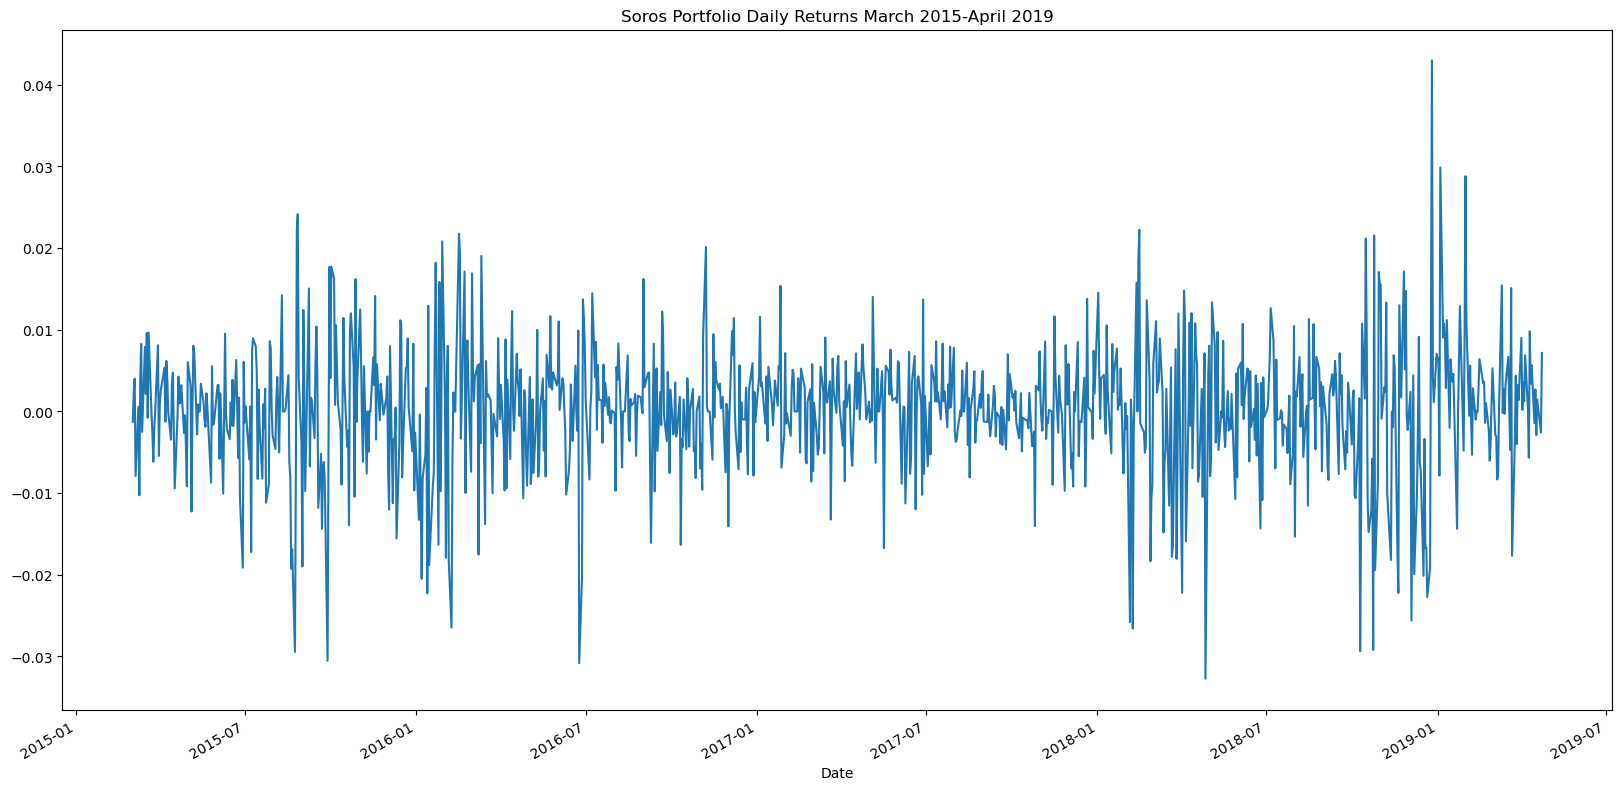

In [21]:
# Plot daily returns of all portfolios
soros_df.plot(figsize=(20,10), title='Soros Portfolio Daily Returns March 2015-April 2019')

<AxesSubplot:title={'center':'Paulson Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

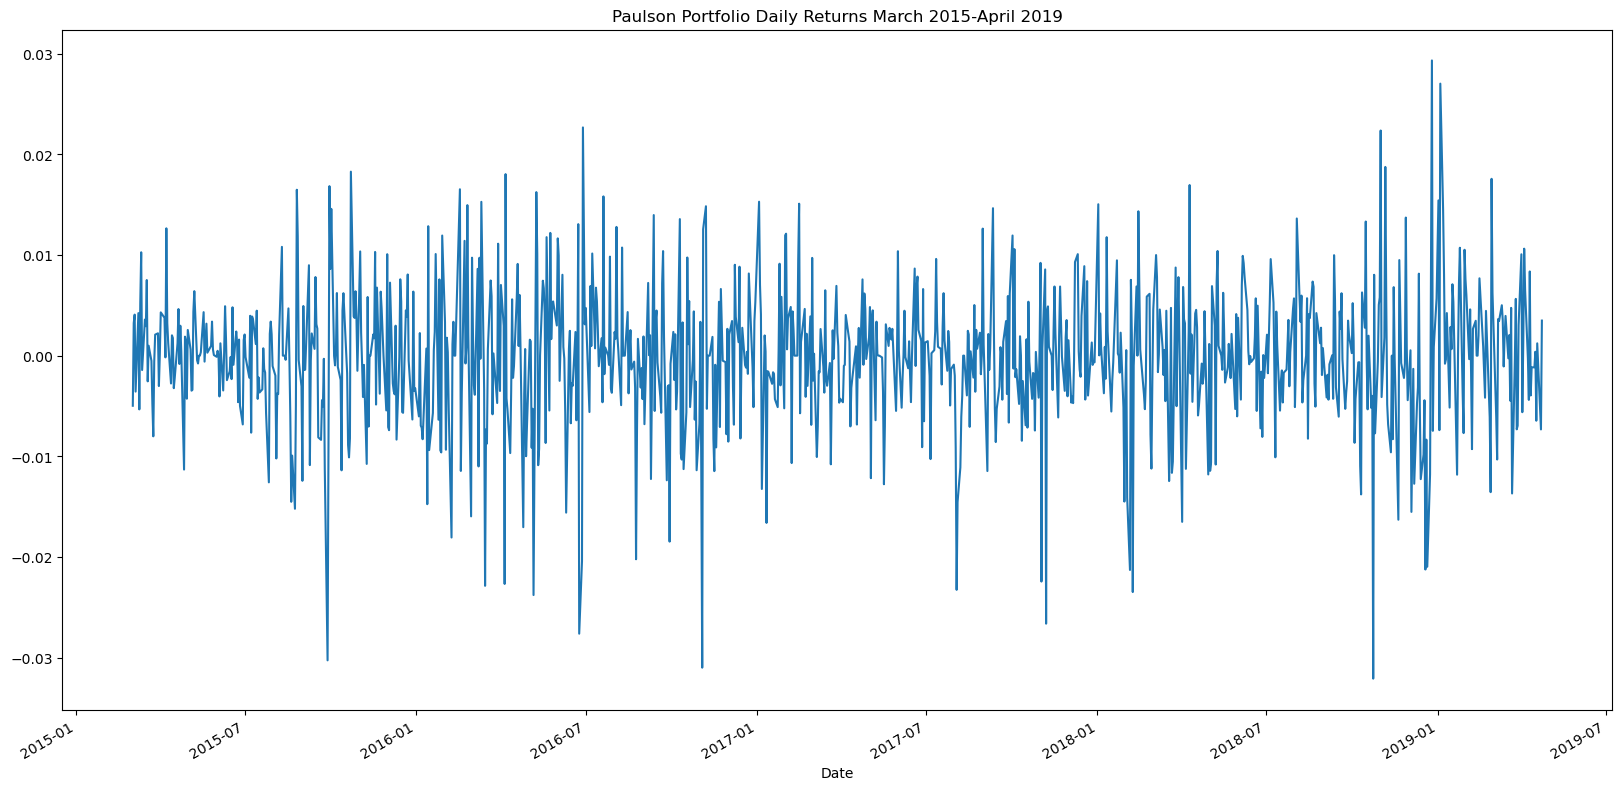

In [22]:
paulson_df.plot(figsize=(20,10), title='Paulson Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'Tiger Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

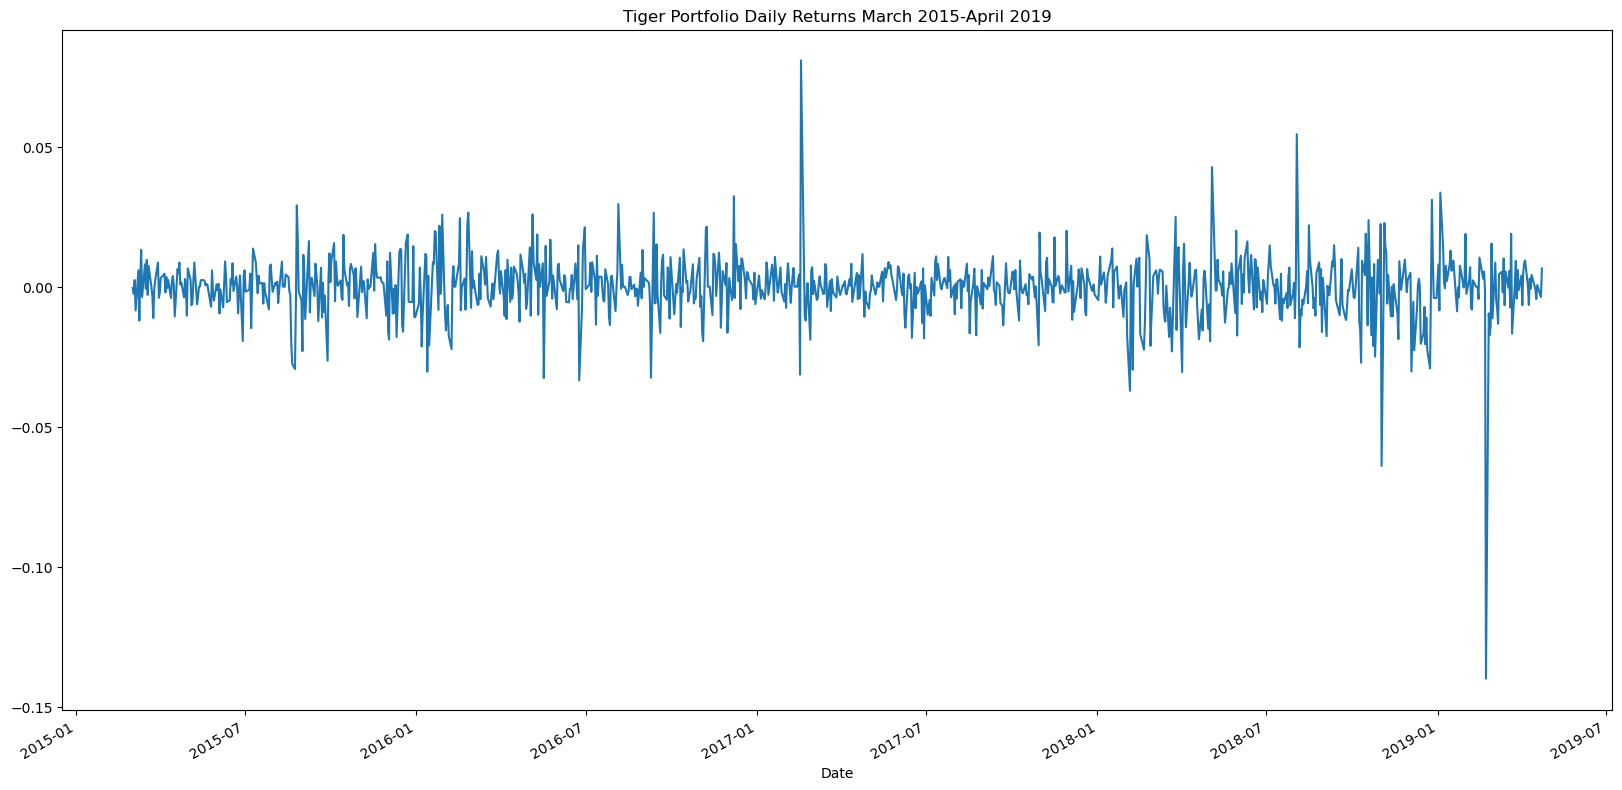

In [23]:
tiger_df.plot(figsize=(20,10), title='Tiger Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'Berkshire Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

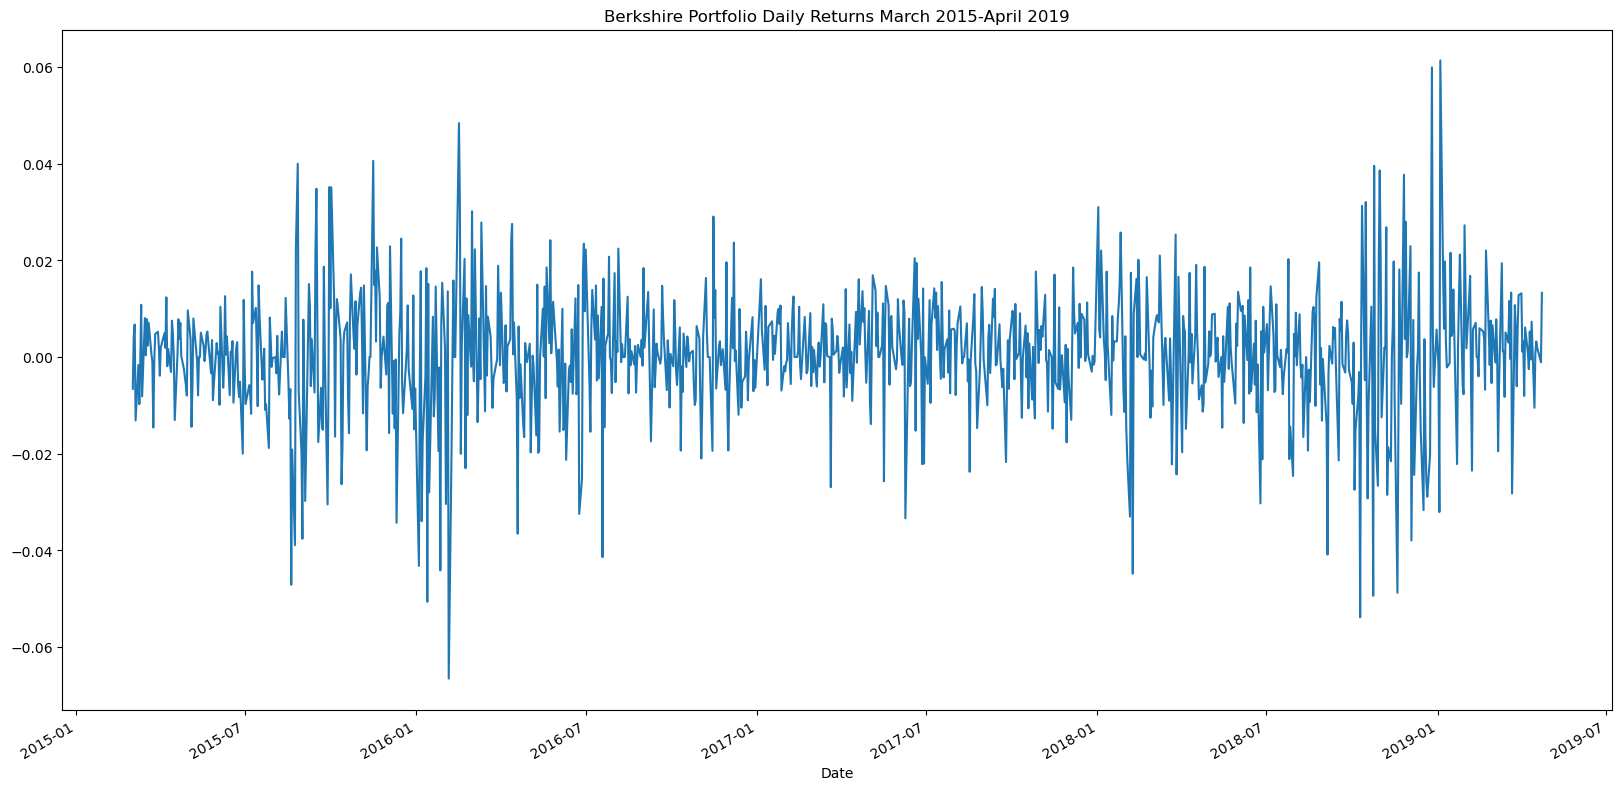

In [24]:
berkshire_df.plot(figsize=(20,10), title='Berkshire Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'Algo 1 Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

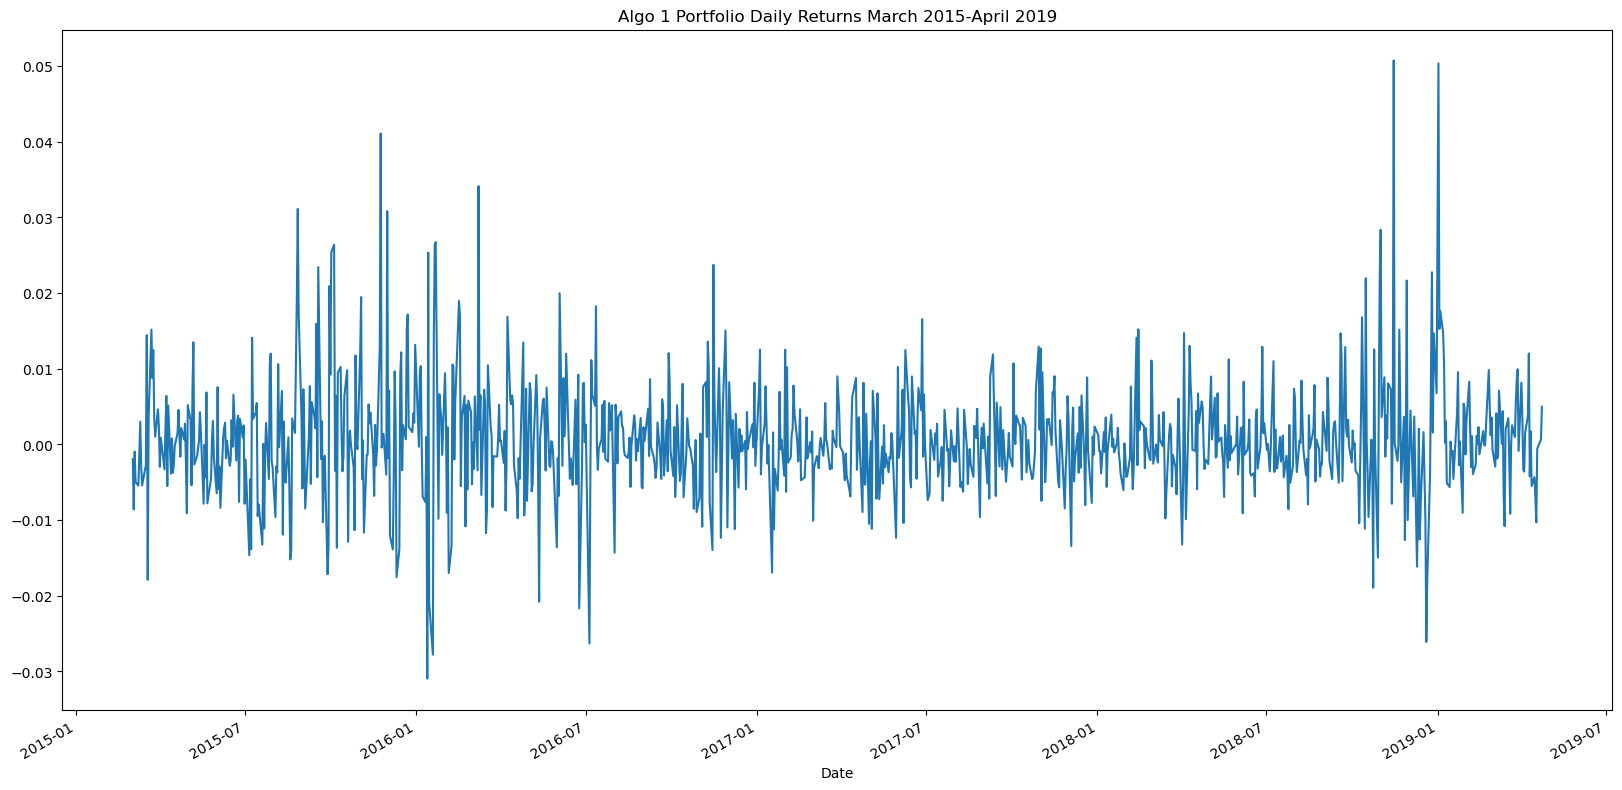

In [25]:
algo_1_df.plot(figsize=(20,10), title='Algo 1 Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'Algo 1 Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

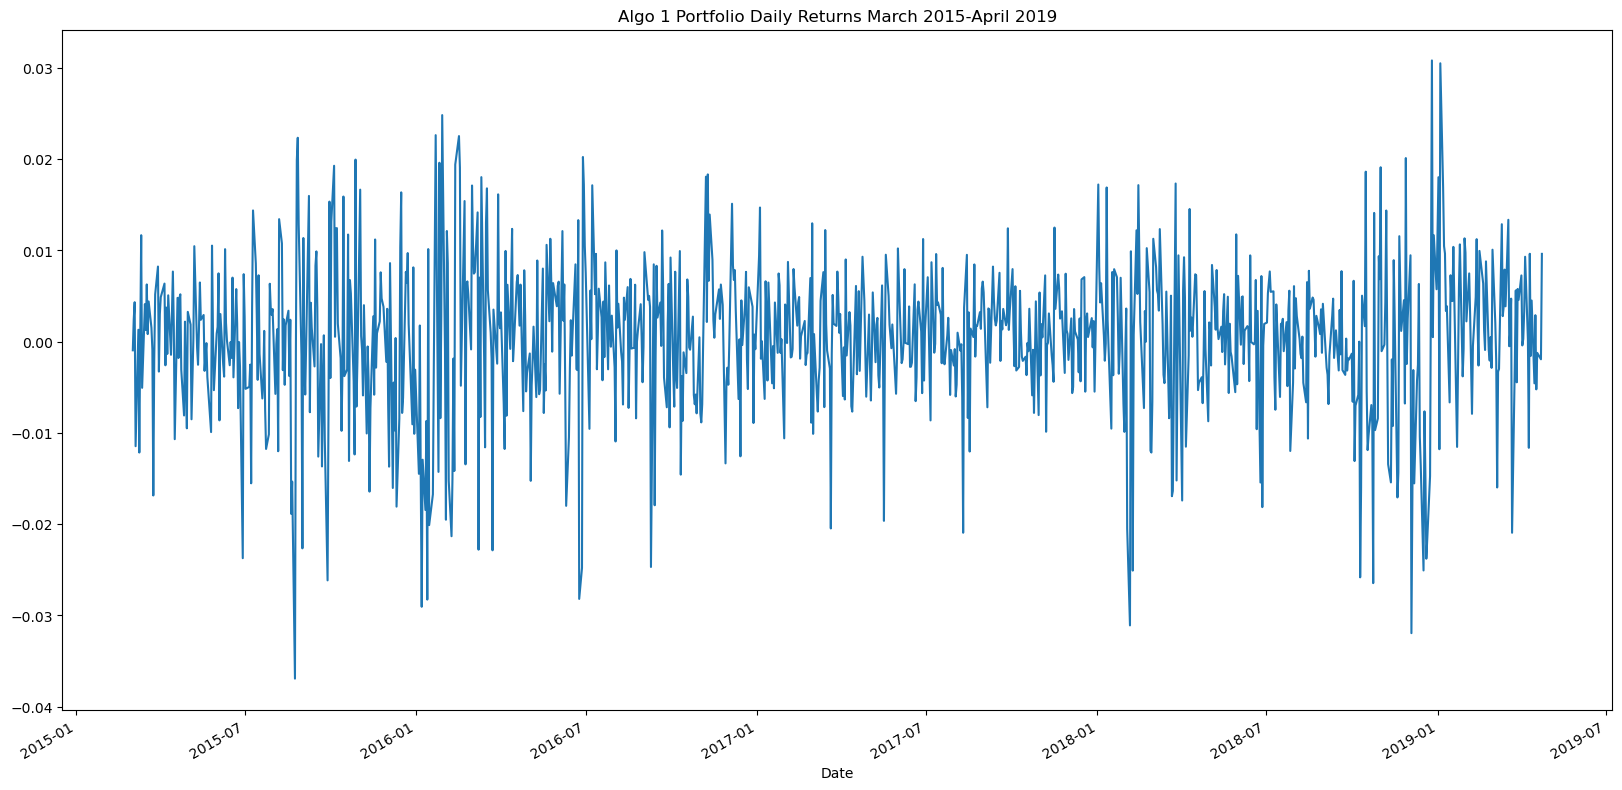

In [26]:
algo_2_df.plot(figsize=(20,10), title='Algo 1 Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'S&P 500 Portfolio Daily Returns March 2015-April 2019'}, xlabel='Date'>

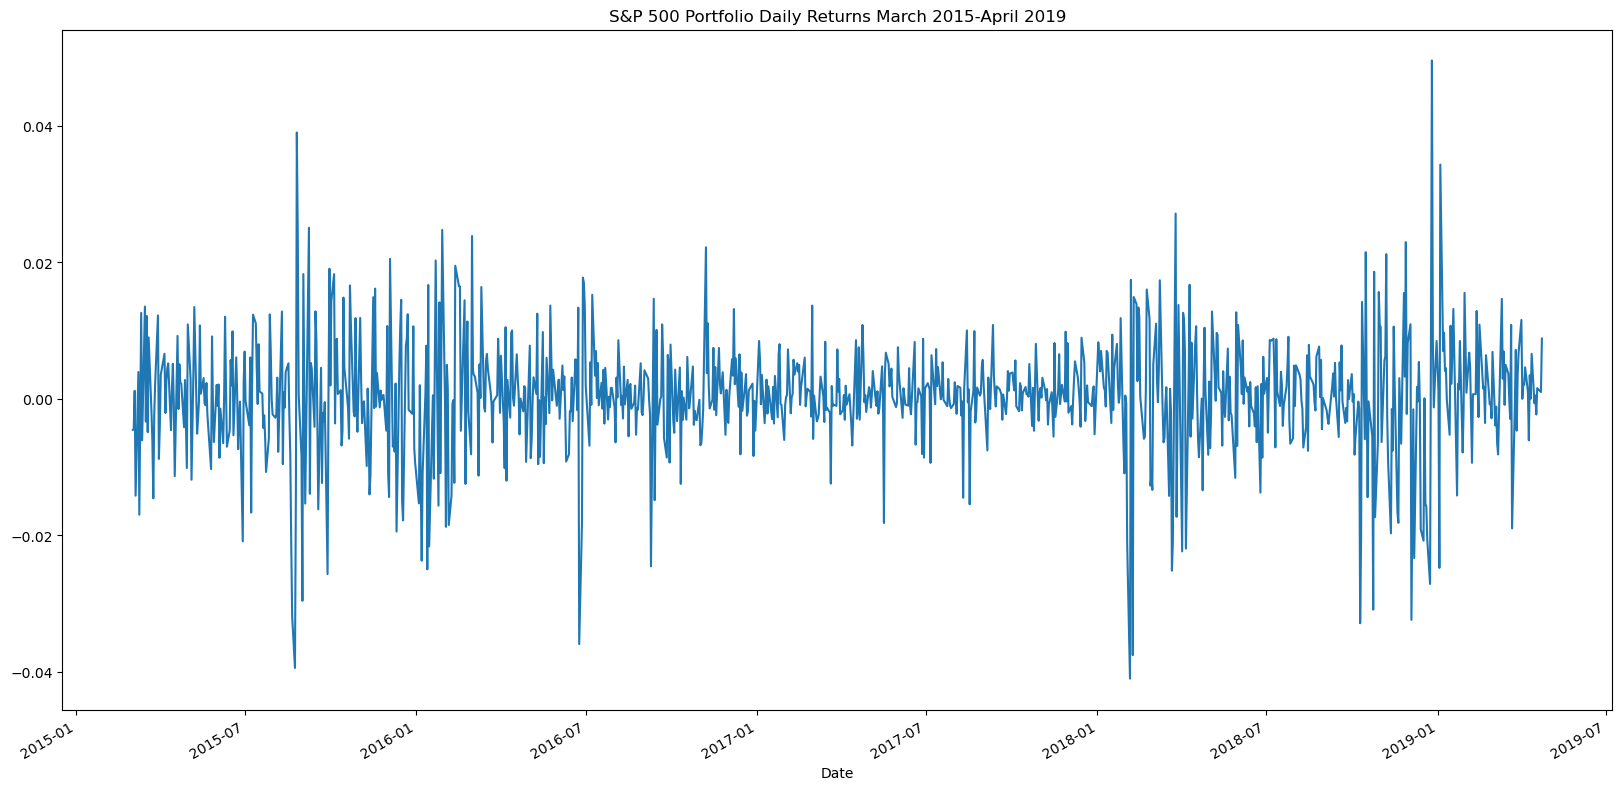

In [27]:
sp500_analysis_df.plot(figsize=(20,10), title='S&P 500 Portfolio Daily Returns March 2015-April 2019')


<AxesSubplot:title={'center':'Portfolio Returns March 2015-April 2019'}, xlabel='Date'>

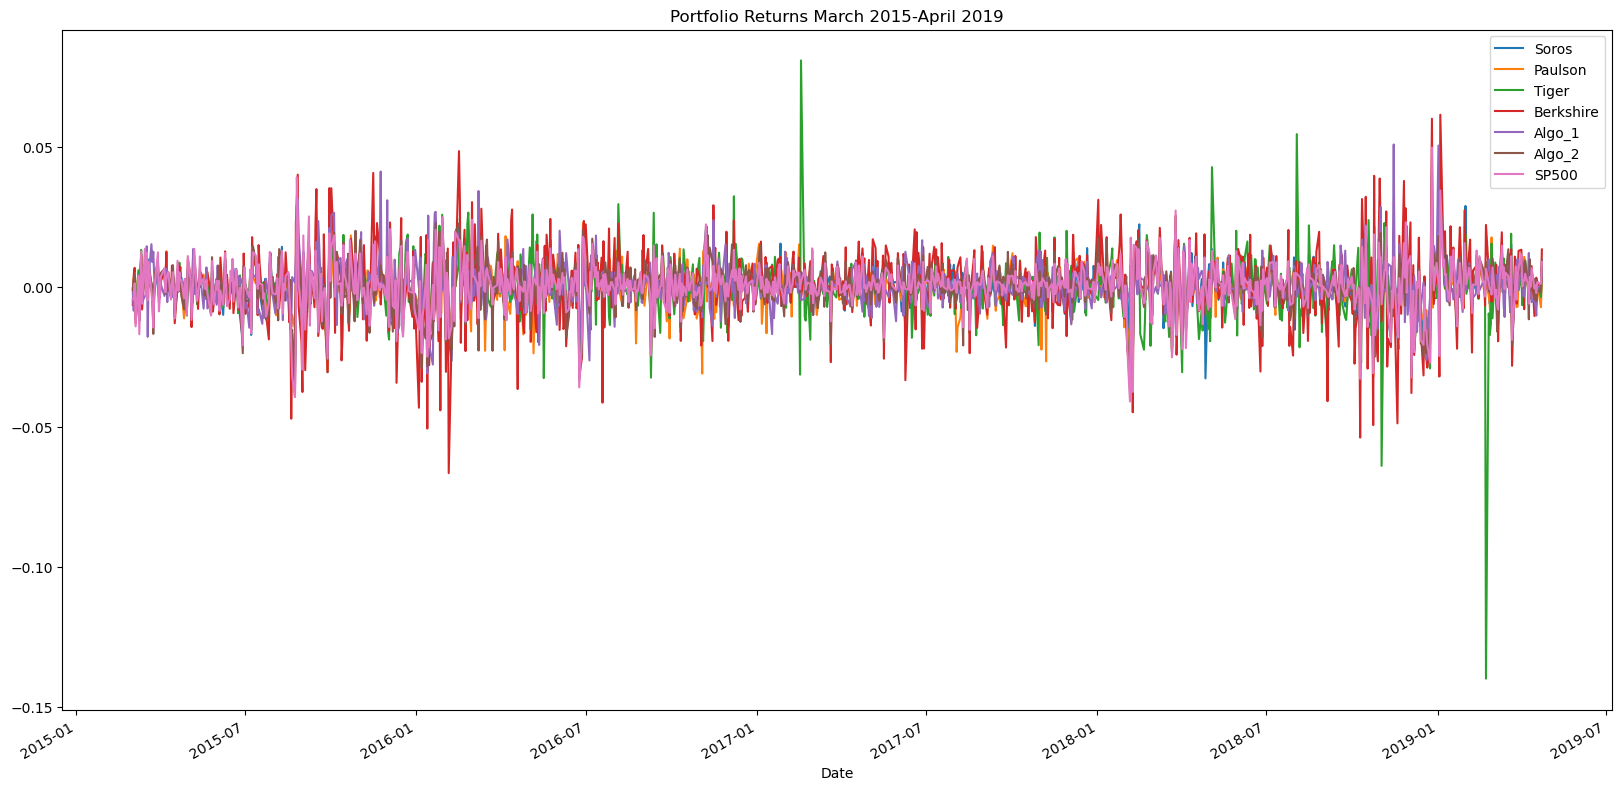

In [28]:
macro_analysis_df.plot(figsize=(20,10), title='Portfolio Returns March 2015-April 2019')


#### Calculate and Plot cumulative returns.

In [29]:
# Calculate cumulative returns of all portfolios
soros_cum_returns = (1 + soros_df).cumprod() - 1
soros_cum_returns

paulson_cum_returns = (1 + paulson_df).cumprod() - 1
paulson_cum_returns

tiger_cum_returns = (1 + tiger_df).cumprod() - 1
tiger_cum_returns

berkshire_cum_returns = (1 + berkshire_df).cumprod() - 1
berkshire_cum_returns

algo_1_cum_returns = (1 + algo_1_df).cumprod() - 1
algo_1_cum_returns

algo_2_cum_returns = (1 + algo_2_df).cumprod() - 1
algo_2_cum_returns

sp500_cum_returns = (1 + sp500_analysis_df).cumprod() - 1
sp500_cum_returns

macro_cum_returns = (1 + macro_analysis_df).cumprod() - 1
macro_cum_returns


Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.000962 -0.001755 -0.003028  -0.002383 -0.010514  0.001464   
2015-03-05  0.004981  0.002314 -0.000681   0.004327 -0.011459  0.005794   
2015-03-06 -0.002963 -0.001269 -0.009156  -0.008828 -0.016359 -0.005733   
2015-03-09 -0.002383  0.002951 -0.003367  -0.010466 -0.021717 -0.004437   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.160965 -0.213189 -0.137920   0.526861  0.944990  0.267768   
2019-04-17  0.157602 -0.218277 -0.141721   0.531781  0.924954  0.261140   
2019-04-18  0.159278 -0.217322 -0.141222   0.534716  0.923823  0.259590   
2019-04-22  0.156280 -0.223061 -0.144348   0.533046  0.925124  0.257151   
2019-04-23  0.164568 -0.220354 -0.138811   0.553401  0.934691  0.269247   

               SP500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.008907  
2015-03-05 -0.007722  
2015-03-06 -0.021786  
2015-03-09 -0.017928  
...              ...  
2019-04-16  0.372945  
2019-04-17  0.369823  
2019-04-18  0.371986  
2019-04-22  0.373375  
2019-04-23  0.385517  

[1043 rows x 7 columns]

<AxesSubplot:title={'center':'Cumulative Returns of Soros Portfolio from March 2015-April 2019'}, xlabel='Date'>

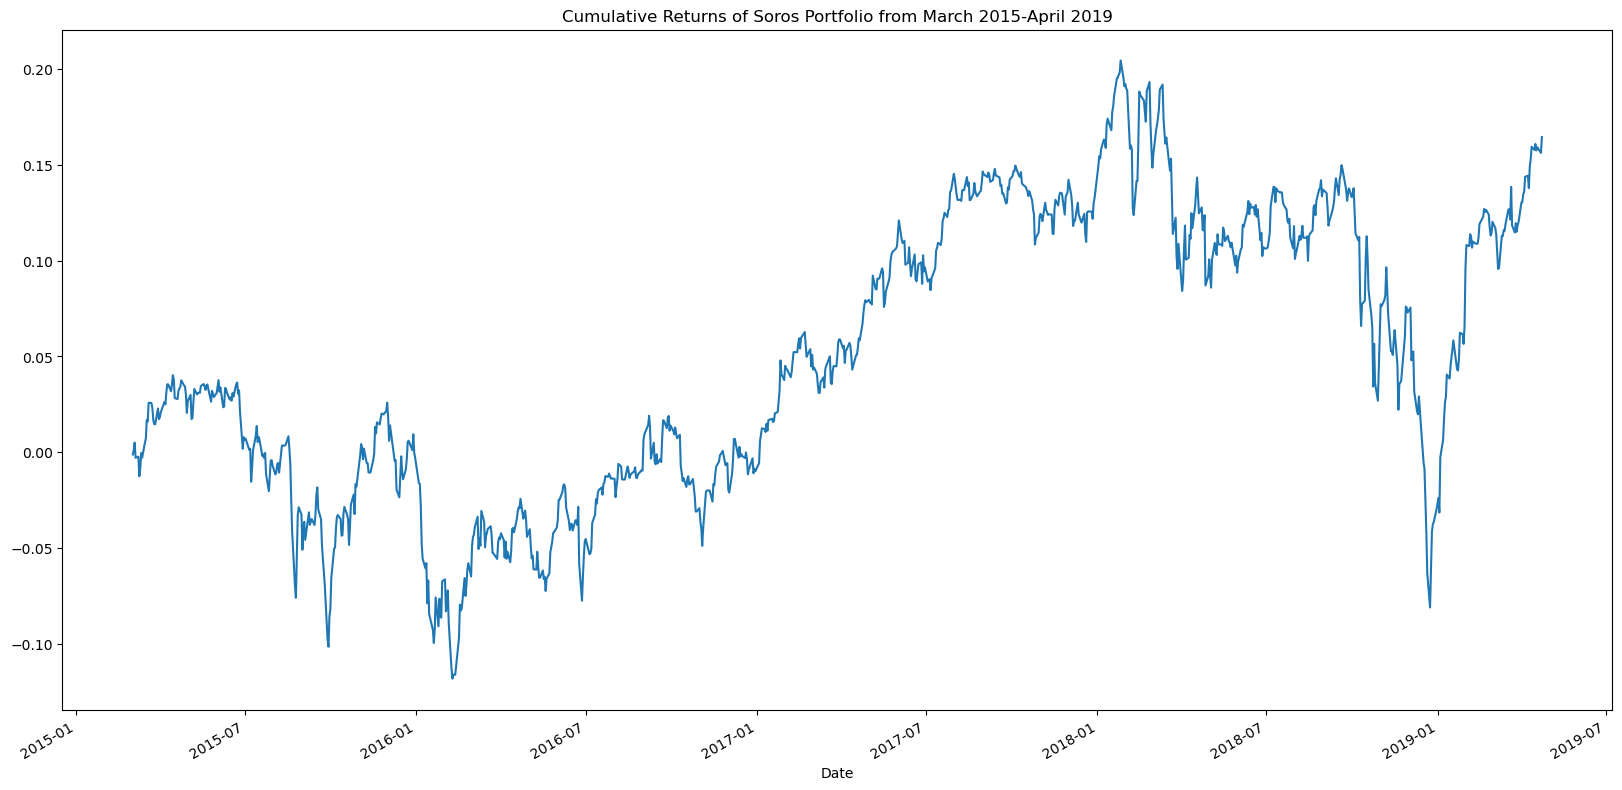

In [30]:
# Plot cumulative returns
soros_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Soros Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of Paulson Portfolio from March 2015-April 2019'}, xlabel='Date'>

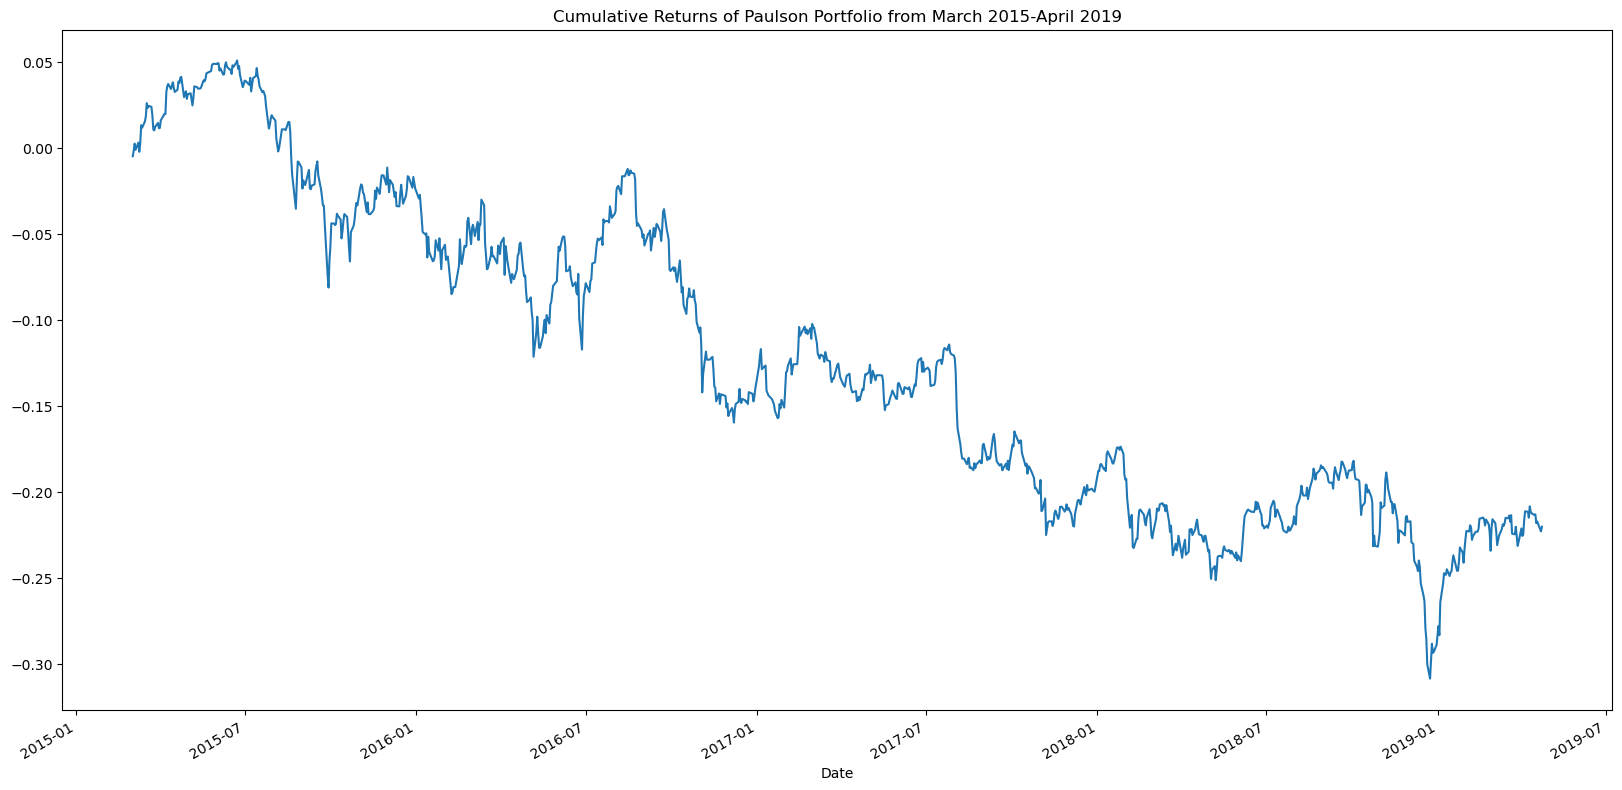

In [31]:
# Plot cumulative returns
paulson_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Paulson Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of Tiger Portfolio from March 2015-April 2019'}, xlabel='Date'>

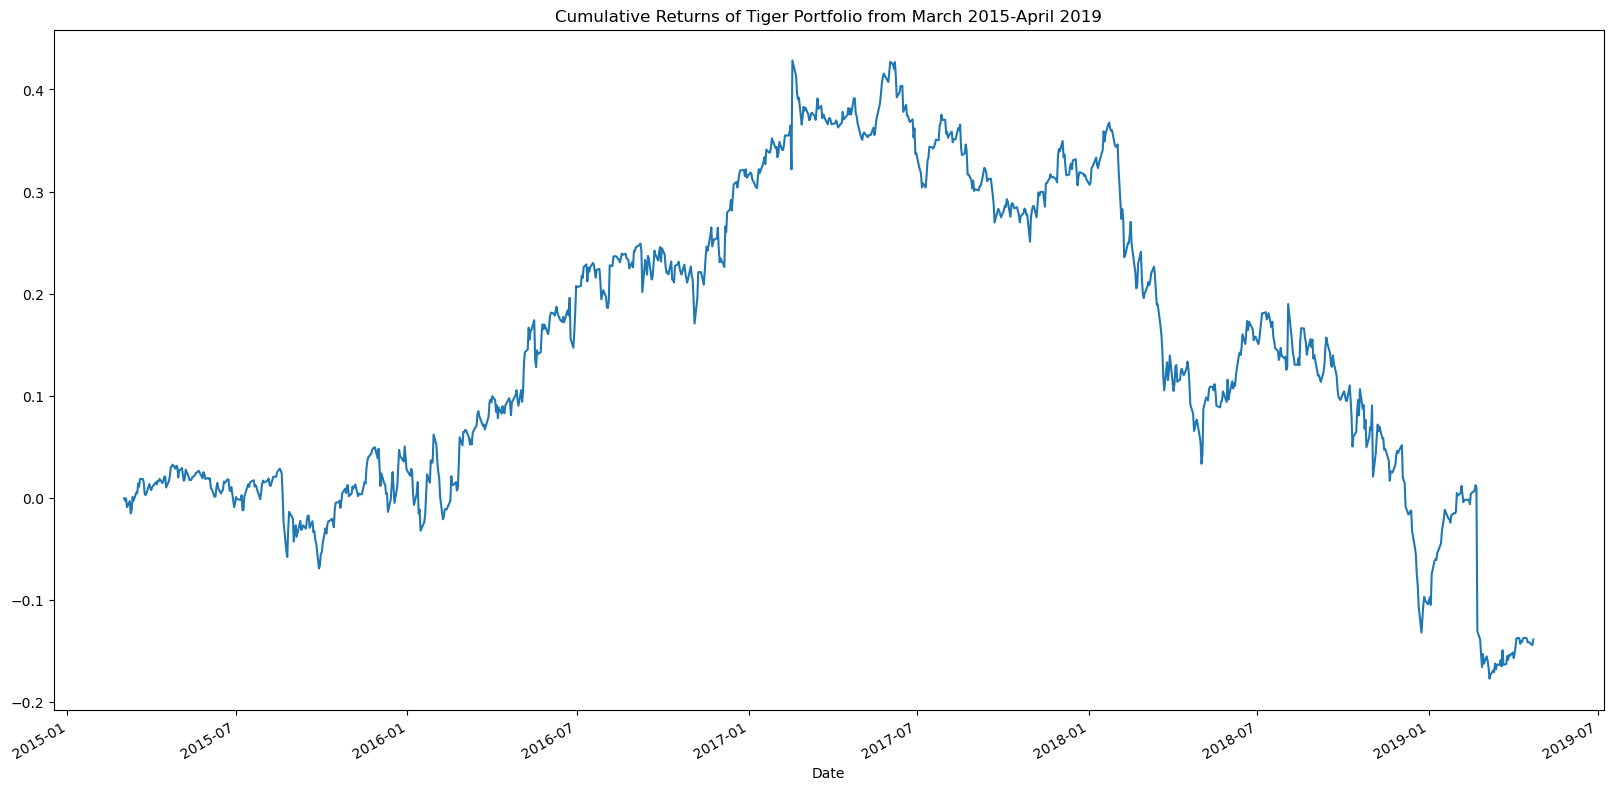

In [32]:
# Plot cumulative returns
tiger_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Tiger Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of Berkshire Portfolio from March 2015-April 2019'}, xlabel='Date'>

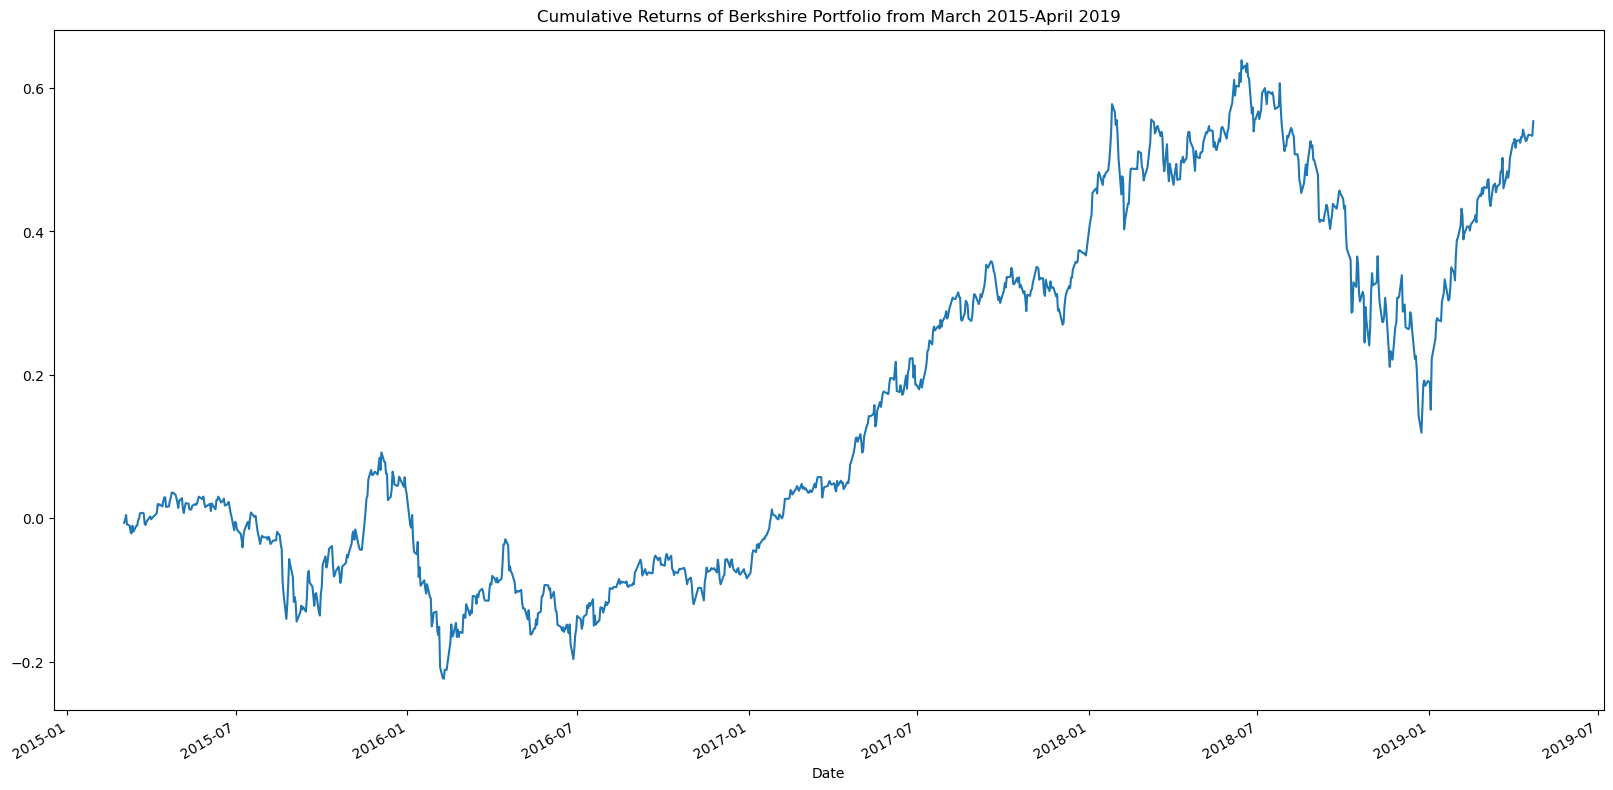

In [33]:
# Plot cumulative returns
berkshire_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Berkshire Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of Algo_1 Portfolio from March 2015-April 2019'}, xlabel='Date'>

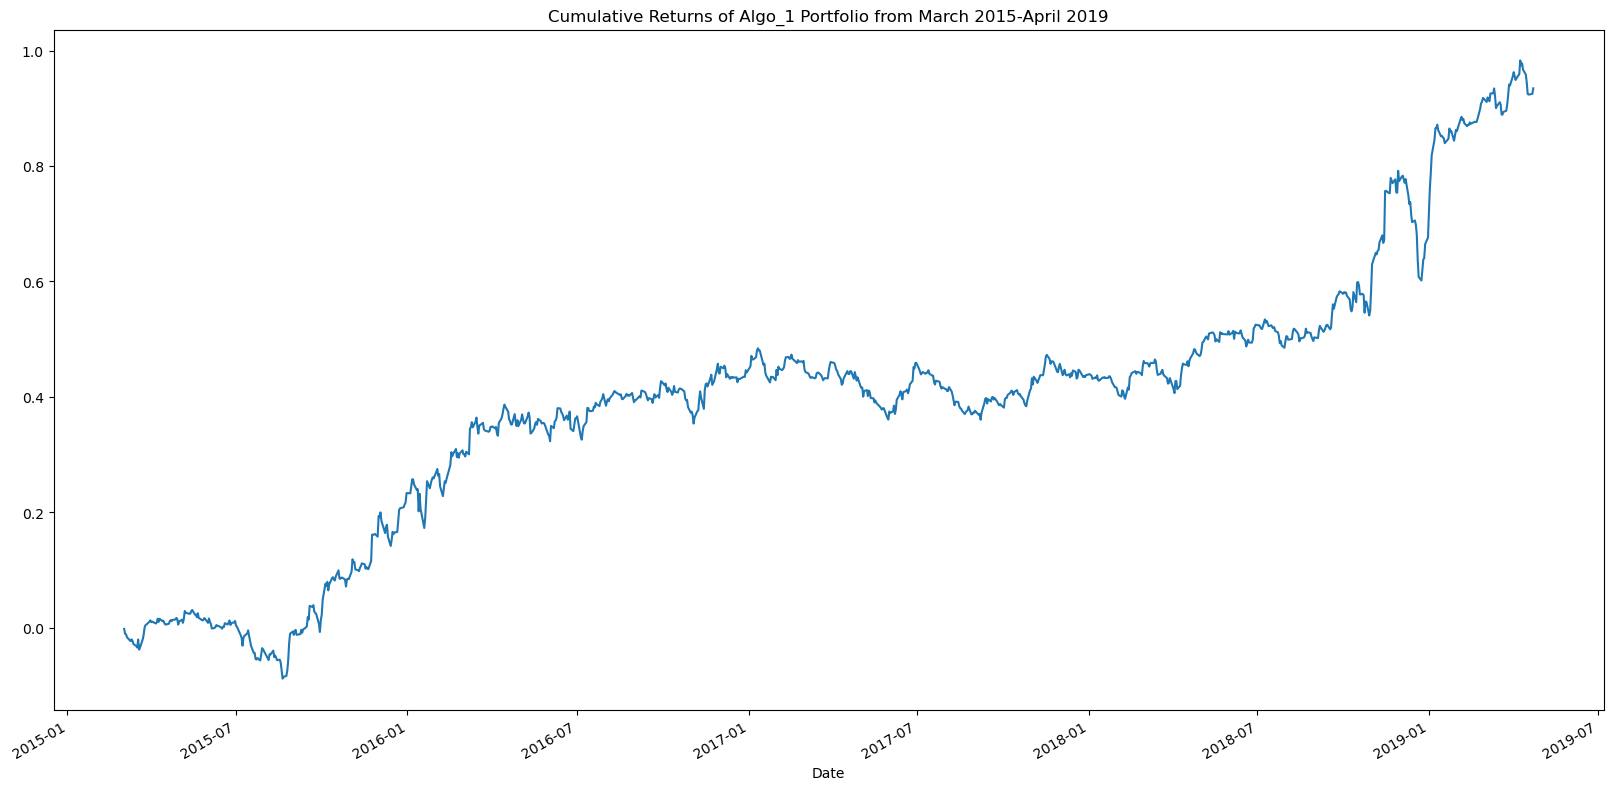

In [34]:
# Plot cumulative returns
algo_1_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Algo_1 Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of Algo_2 Portfolio from March 2015-April 2019'}, xlabel='Date'>

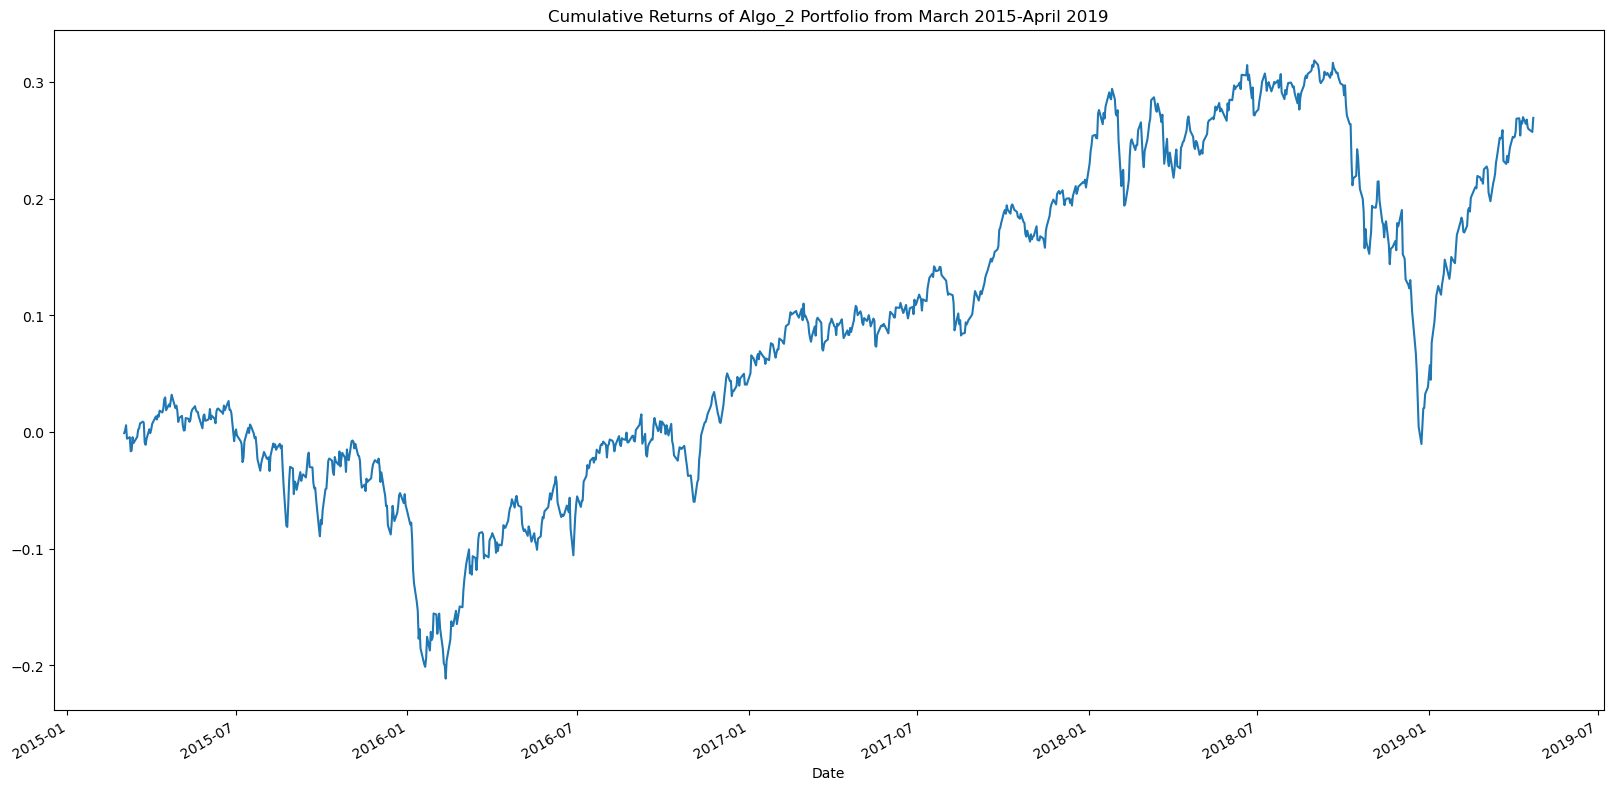

In [35]:
# Plot cumulative returns
algo_2_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of Algo_2 Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of S&P 500 Portfolio from March 2015-April 2019'}, xlabel='Date'>

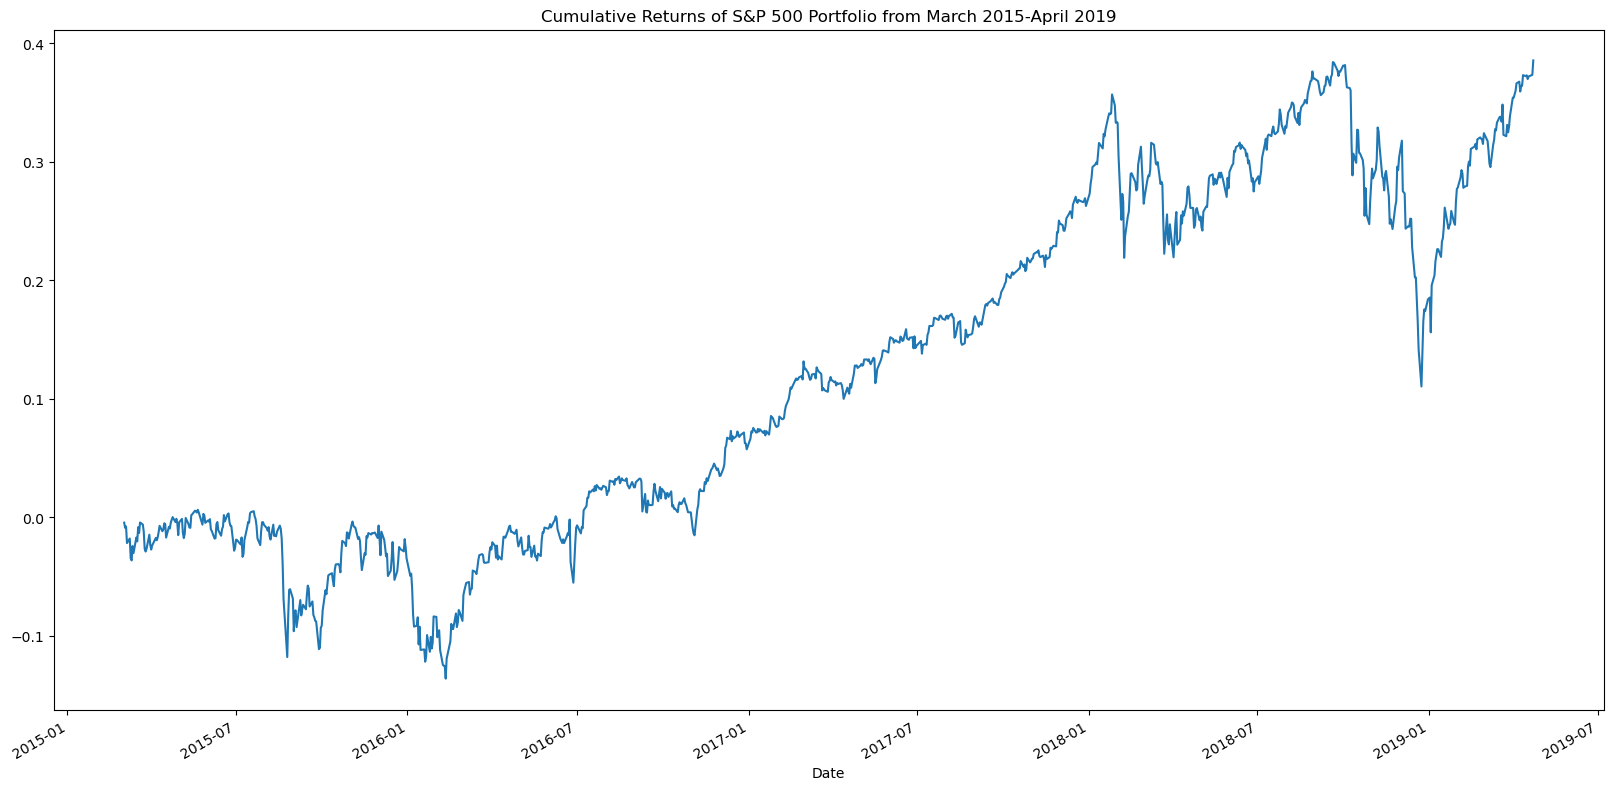

In [36]:
# Plot cumulative returns
sp500_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of S&P 500 Portfolio from March 2015-April 2019')


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios from March 2015-April 2019'}, xlabel='Date'>

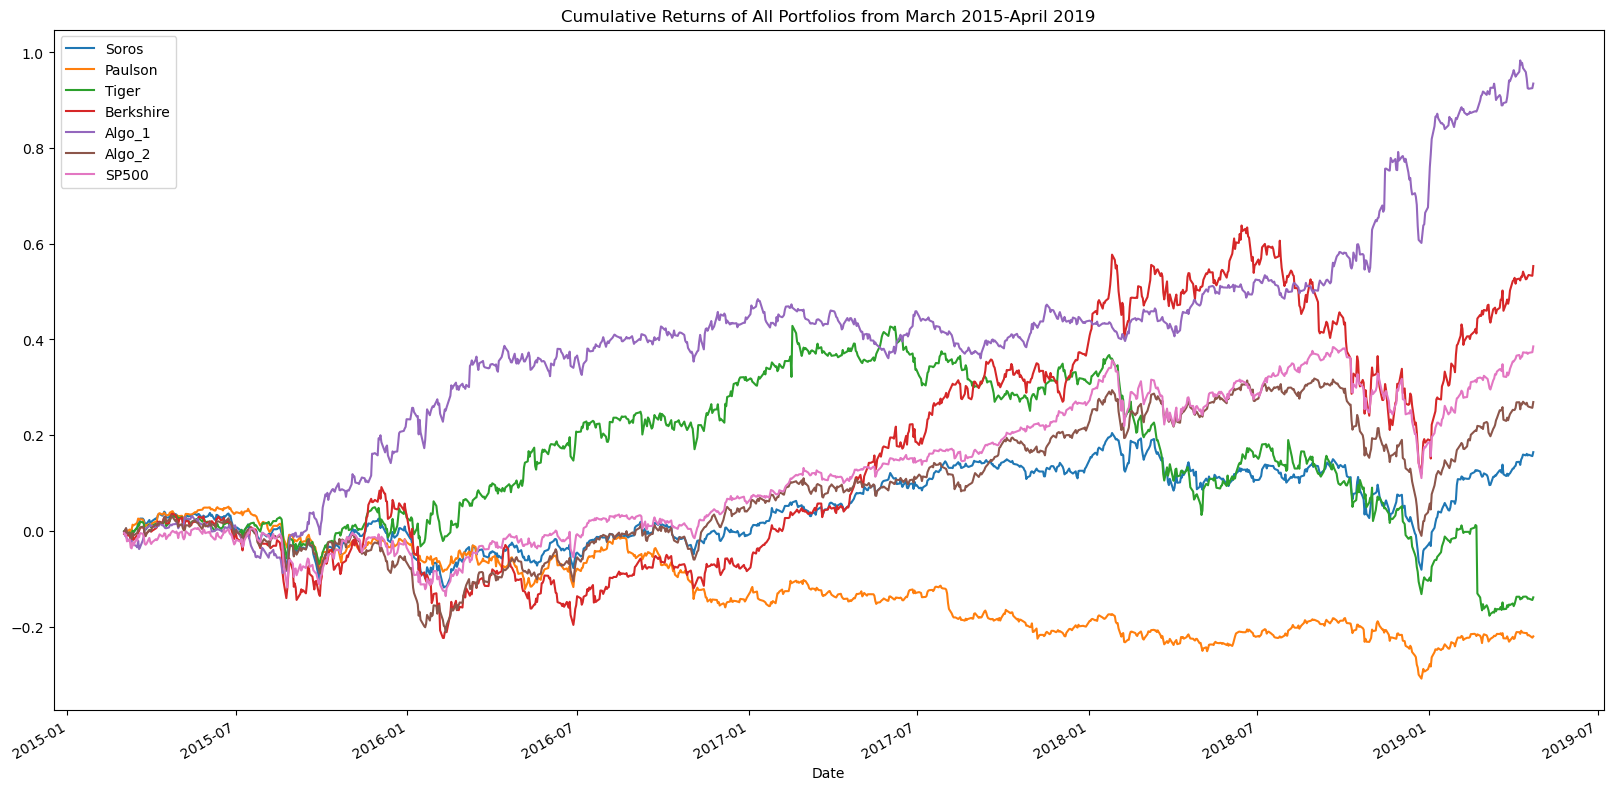

In [37]:
# Plot cumulative returns
macro_cum_returns.plot(figsize=(20,10), title='Cumulative Returns of All Portfolios from March 2015-April 2019')


In [38]:
macro_cum_returns


Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.000962 -0.001755 -0.003028  -0.002383 -0.010514  0.001464   
2015-03-05  0.004981  0.002314 -0.000681   0.004327 -0.011459  0.005794   
2015-03-06 -0.002963 -0.001269 -0.009156  -0.008828 -0.016359 -0.005733   
2015-03-09 -0.002383  0.002951 -0.003367  -0.010466 -0.021717 -0.004437   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.160965 -0.213189 -0.137920   0.526861  0.944990  0.267768   
2019-04-17  0.157602 -0.218277 -0.141721   0.531781  0.924954  0.261140   
2019-04-18  0.159278 -0.217322 -0.141222   0.534716  0.923823  0.259590   
2019-04-22  0.156280 -0.223061 -0.144348   0.533046  0.925124  0.257151   
2019-04-23  0.164568 -0.220354 -0.138811   0.553401  0.934691  0.269247   

               SP500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.008907  
2015-03-05 -0.007722  
2015-03-06 -0.021786  
2015-03-09 -0.017928  
...              ...  
2019-04-16  0.372945  
2019-04-17  0.369823  
2019-04-18  0.371986  
2019-04-22  0.373375  
2019-04-23  0.385517  

[1043 rows x 7 columns]

In [39]:
macro_cum_returns.max().sort_values(ascending=False)

Algo_1       0.982997
Berkshire    0.638119
Tiger        0.428464
SP500        0.385517
Algo_2       0.318465
Soros        0.204573
Paulson      0.050682
dtype: float64

---

### Summary of Returns Analysis:


##### When we rank portfolios under consideration by cumulative returns over the time period selected we see the following:



##### Portfolio Rankings on Cumulative Returns: (~48.5 months 3-3-15 to 4-23-19):

1. Algo 1:      98.2%
2. Berkshire:   63.8%
3. Tiger:       42.8%
4. S&P 500:     38.6%
5. Algo 2:      31.8%
6. Soros:       20.5%
7. Paulson:      5.1%

##### This shows us three portfolios beat the S&P 500 in cumulative returns over this time period: 
* Algo 1, Berkshire and Tiger  

##### Three portfolio returns were below market during this time period: 
* Algo 2, Soros and Paulson

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot of Daily Return Range by Portfolios from March 2015-April 2019'}>

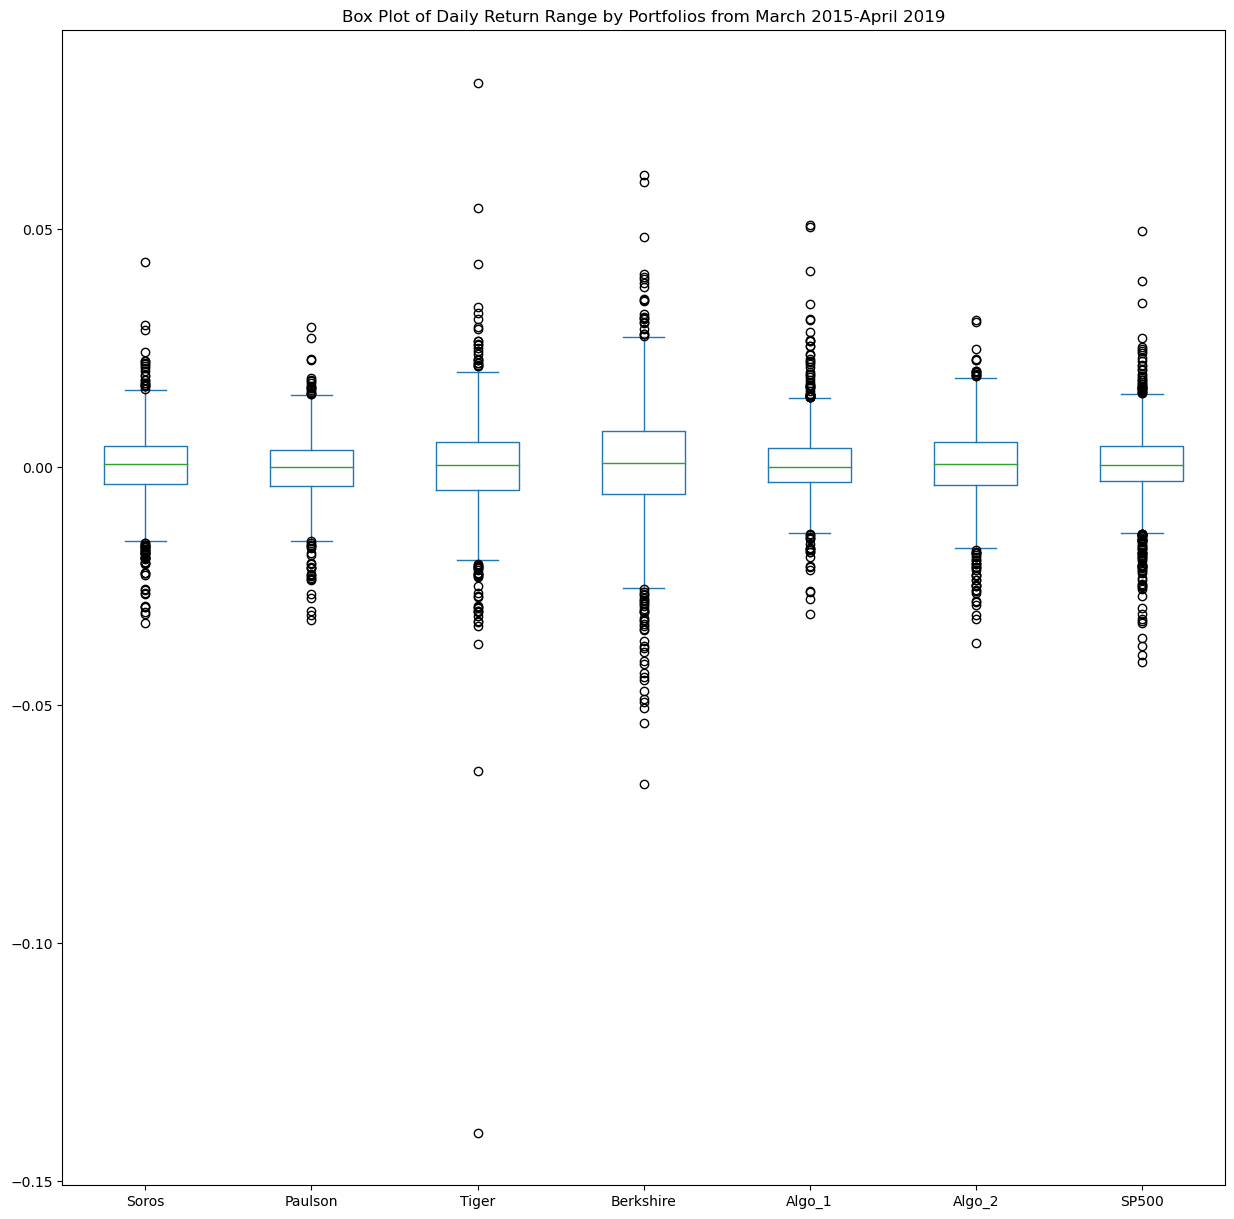

In [40]:

# Box plot to visually show risk
macro_analysis_df.plot(kind="box", figsize=(15,15), title="Box Plot of Daily Return Range by Portfolios from March 2015-April 2019")


### Calculate Standard Deviations

In [41]:
# Calculate the daily standard deviations of all portfolios
macro_daily_std = macro_analysis_df.std()
macro_daily_std.head()

soros_sd = round(soros_df.std(), 5)
paulson_sd = round(paulson_df.std(), 5)
tiger_sd = round(tiger_df.std(), 5)
berkshire_sd = round(berkshire_df.std(), 5)
algo_1_sd = round(algo_1_df.std(), 5)
algo_2_sd = round(algo_2_df.std(), 5)
sp500_sd = round(sp500_analysis_df.std(), 5)

print('Soros standard deviation is', soros_sd)
print('Paulson standard deviation i', paulson_sd)
print('Tiger standard deviation is', tiger_sd)
print('Berkshire standard deviation is', berkshire_sd)
print('Algo_1 standard deviation is', algo_1_sd)
print('Algo_2 standard deviation is', algo_2_sd)
print('S&P 500 standard deviation is', sp500_sd)


Soros standard deviation is 0.0079
Paulson standard deviation i 0.00702
Tiger standard deviation is 0.01089
Berkshire standard deviation is 0.01292
Algo_1 standard deviation is 0.00762
Algo_2 standard deviation is 0.00834
S&P 500 standard deviation is 0.00855


### Determine which portfolios are riskier than the S&P 500

In [42]:
# Calculate  the daily standard deviation of S&P 500
print('S&P 500 standard deviation is', sp500_sd)

# Determine which portfolios are riskier than the S&P 500
macro_std = macro_daily_std.sort_values(ascending=False)
macro_std


S&P 500 standard deviation is 0.00855


Berkshire    0.012919
Tiger        0.010894
SP500        0.008554
Algo_2       0.008342
Soros        0.007895
Algo_1       0.007620
Paulson      0.007023
dtype: float64

In [43]:
if soros_sd > sp500_sd:
    print('Soros portfolio is riskier than S&P500')

if paulson_sd > sp500_sd:
    print('Paulson portfolio is riskier than S&P500')

if tiger_sd > sp500_sd:
    print('Tiger portfolio is riskier than S&P500')

if berkshire_sd > sp500_sd:
    print('Berkshire portfolio is riskier than S&P500')

if algo_1_sd > sp500_sd:
    print('Algo_1 portfolio is riskier than S&P500')

if algo_2_sd > sp500_sd:
    print('Algo_2 portfolio is riskier than S&P500')

Tiger portfolio is riskier than S&P500
Berkshire portfolio is riskier than S&P500


### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
macro_annualized_std = macro_daily_std * np.sqrt(252)

macro_annualized_std = macro_annualized_std.sort_values()
macro_annualized_std

Paulson      0.111488
Algo_1       0.120967
Soros        0.125335
Algo_2       0.132430
SP500        0.135786
Tiger        0.172936
Berkshire    0.205077
dtype: float64

### Summary of Volatility Analysis (over cumulative time period - static):


##### Portfolio  Ranking (~48.5 months 3-3-15 to 4-23-19):

* Portfolios with lower standard deviations are better investments as they show less volatility in returns

1. Paulson
2. Algo 1
3. Soros
4. Algo 2
5. S&P 500
6. Tiger
7. Berkshire

##### This shows us four portfolios beat the S&P 500 by producing lower volatility in returns: 
* Paulson, Algo 1, Soros and Algo 2

##### Two portfolios were below market and produced higher volatility in returns: 
* Tiger and Berkshire

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

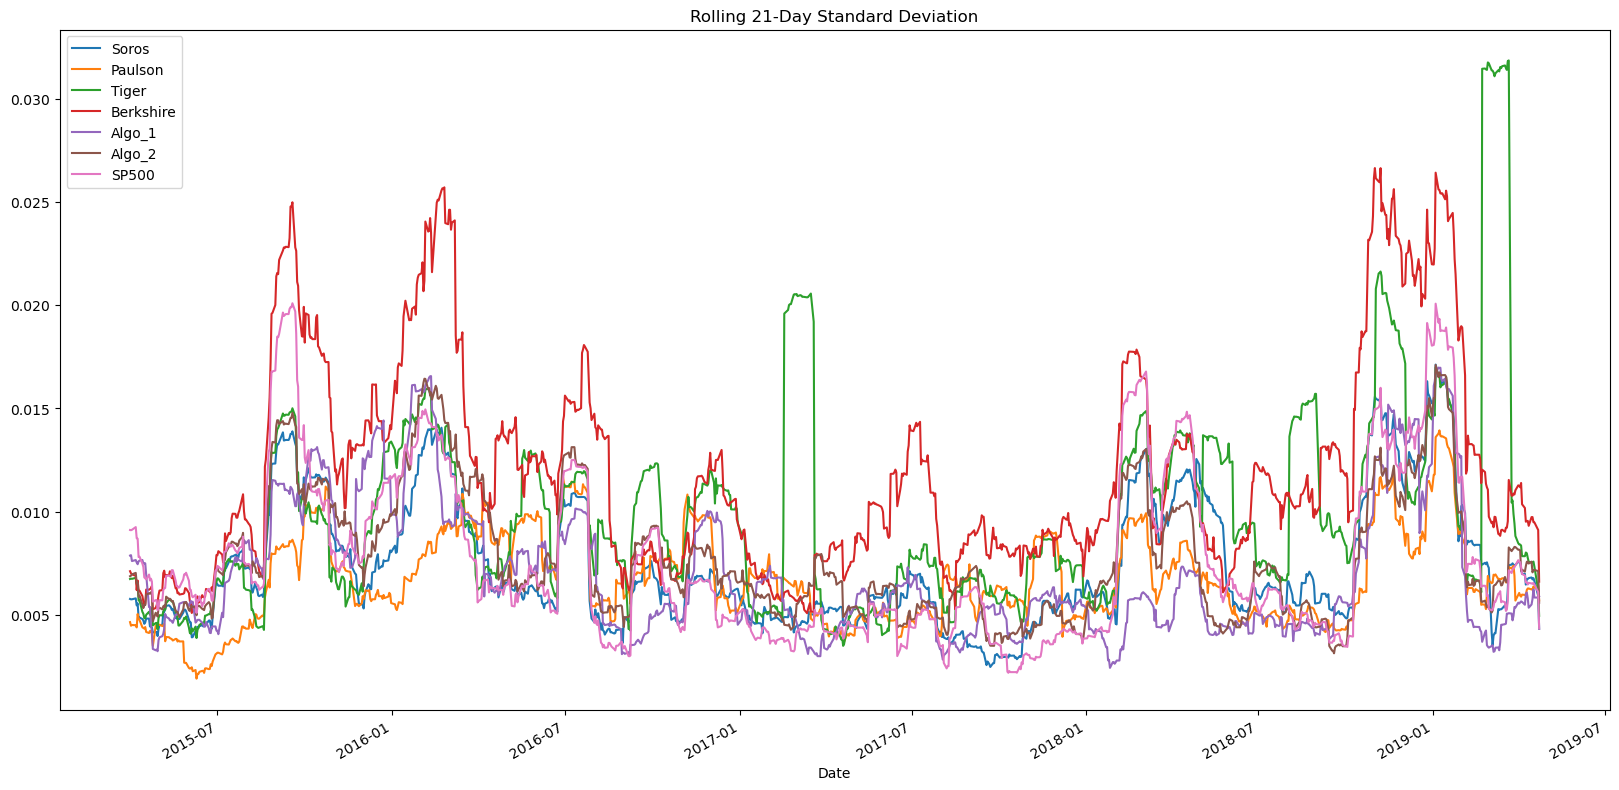

In [45]:

# Calculate the rolling standard deviation for all portfolios using a 21-day window

macro_sd21_df = macro_analysis_df.rolling(window=21).std()
macro_sd21_df.plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')

soros_sd21 = macro_sd21_df['Soros']

paulson_sd21 = macro_sd21_df['Paulson']

tiger_sd21 = macro_sd21_df['Tiger']

berkshire_sd21 = macro_sd21_df['Berkshire']

algo_1_sd21 = macro_sd21_df['Algo_1']

algo_2_sd21 = macro_sd21_df['Algo_2']

sp500_analysis_sd21 = macro_sd21_df['SP500']

<AxesSubplot:title={'center':'Soros Rolling 21-Day Standard Deviation'}, xlabel='Date'>

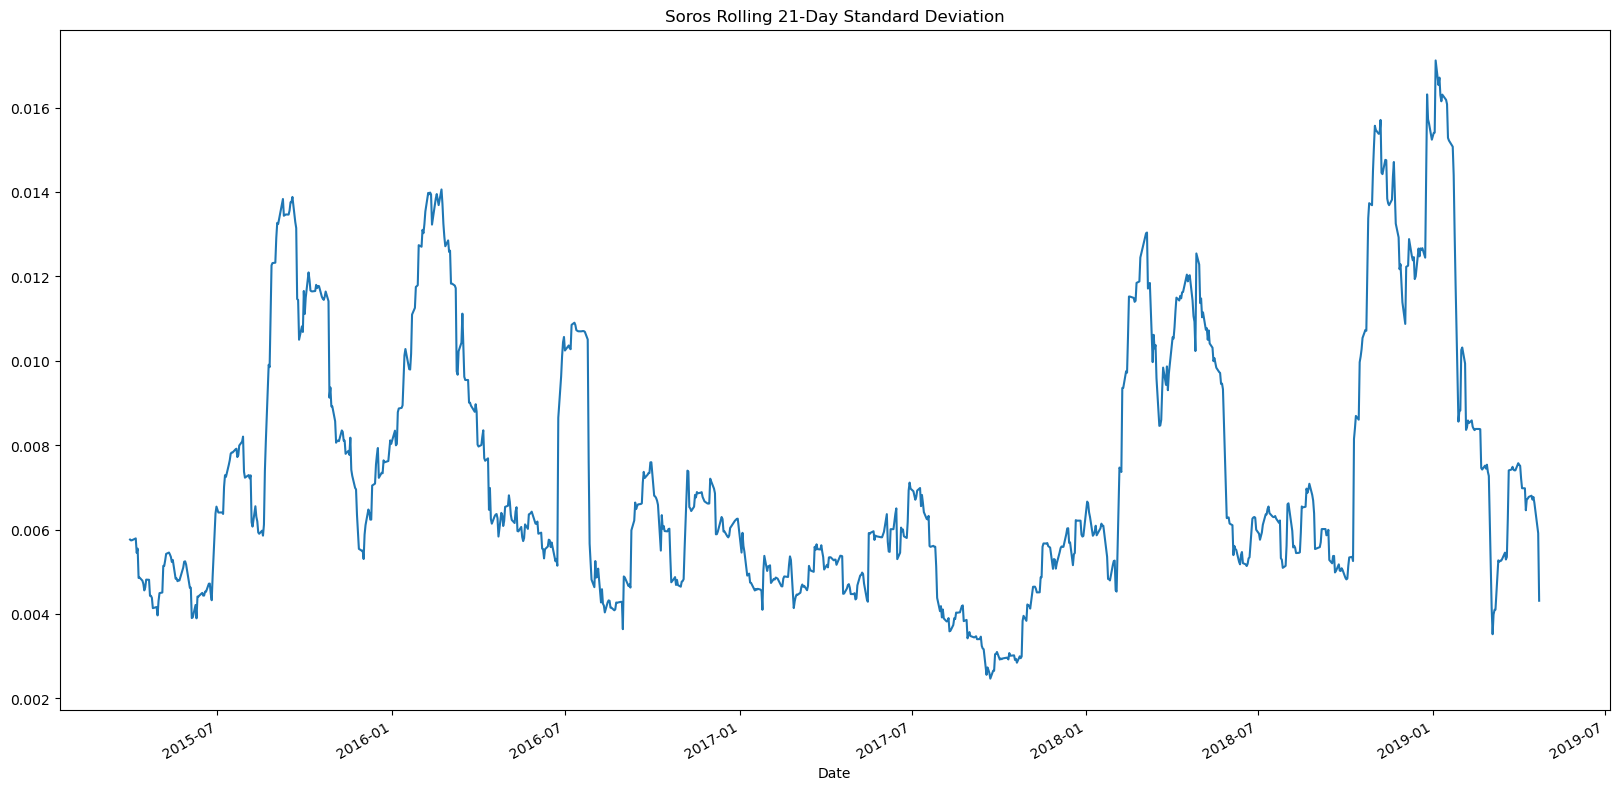

In [46]:
soros_sd21.plot(figsize=(20, 10), title='Soros Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'Paulson Rolling 21-Day Standard Deviation'}, xlabel='Date'>

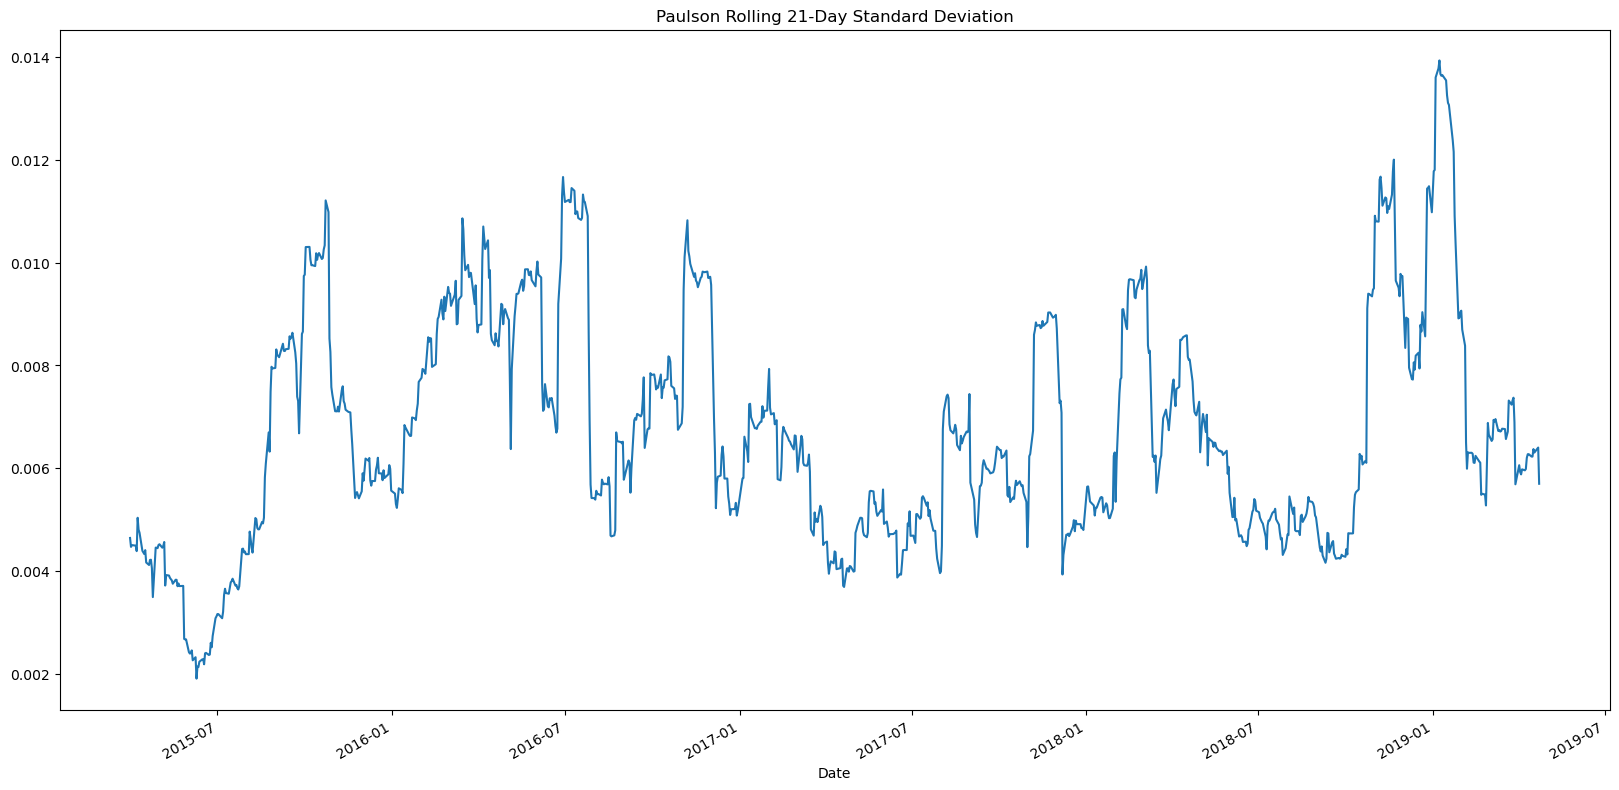

In [47]:
paulson_sd21.plot(figsize=(20, 10), title='Paulson Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'Tiger Rolling 21-Day Standard Deviation'}, xlabel='Date'>

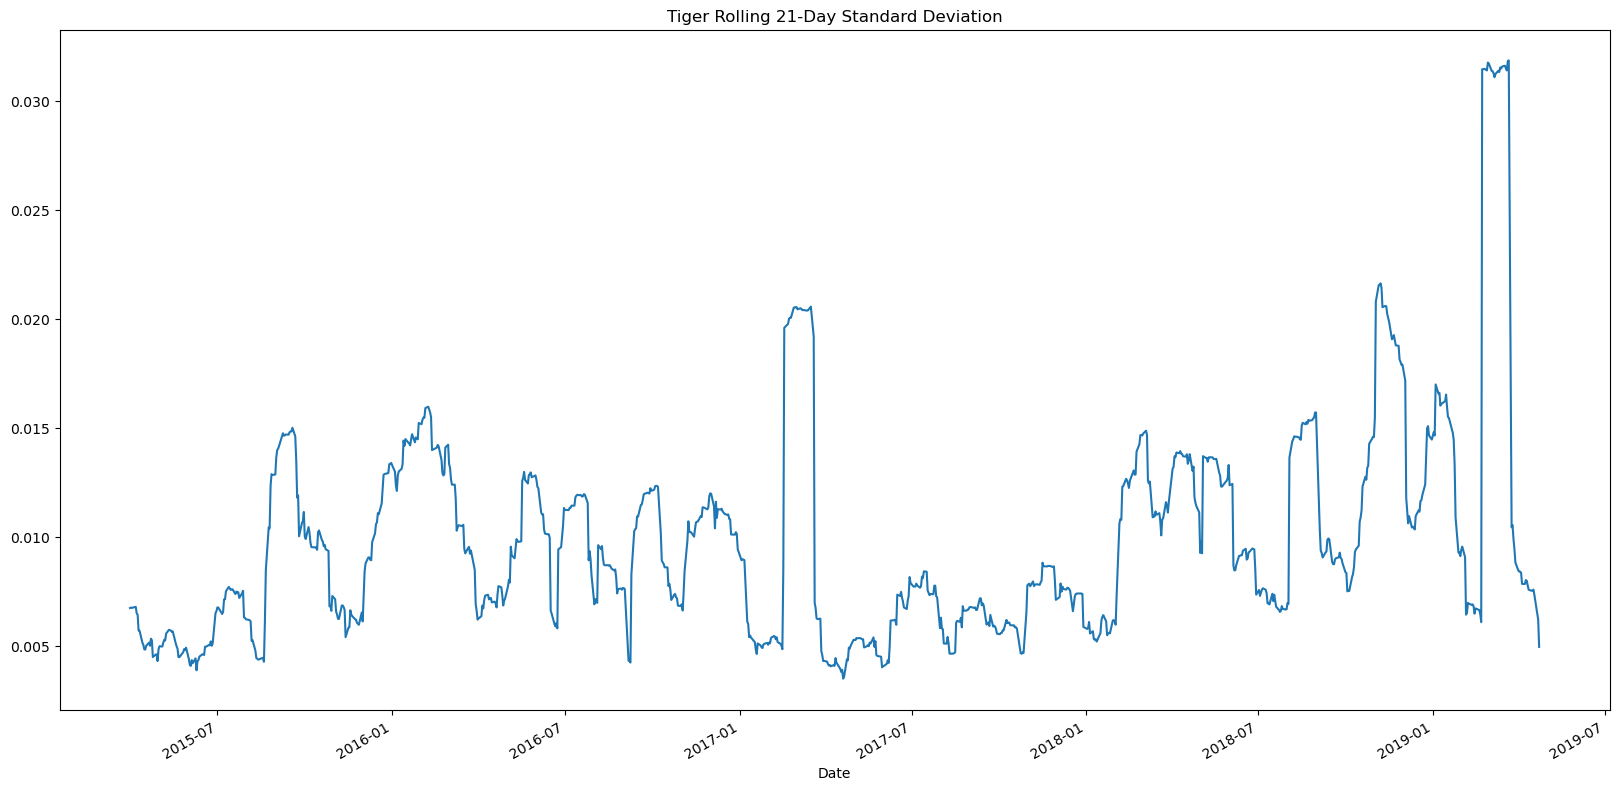

In [48]:
tiger_sd21.plot(figsize=(20, 10), title='Tiger Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'Berkshire Rolling 21-Day Standard Deviation'}, xlabel='Date'>

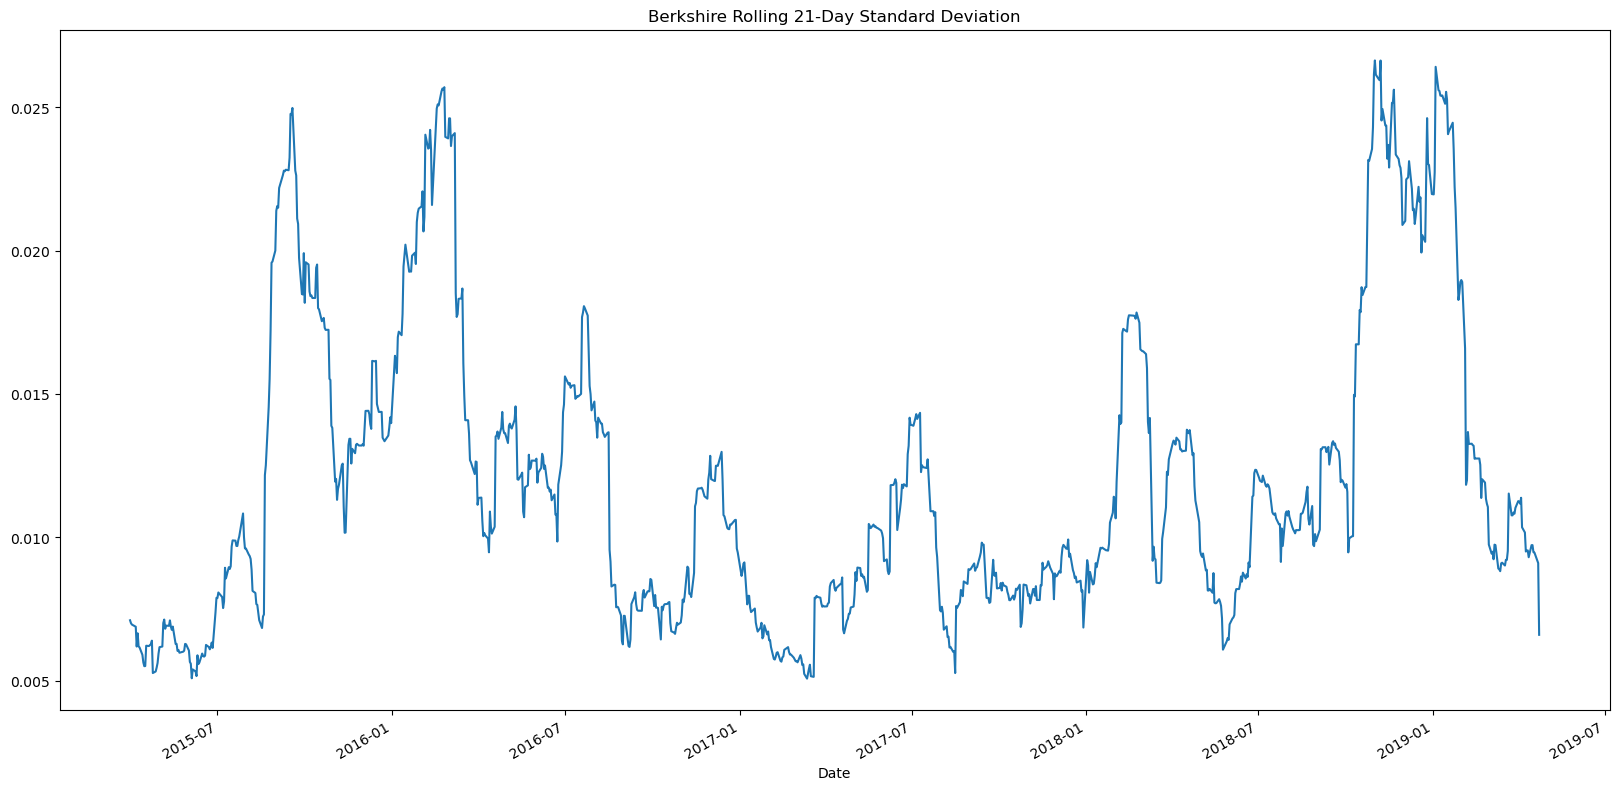

In [49]:
berkshire_sd21.plot(figsize=(20, 10), title='Berkshire Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'Algo 1 Rolling 21-Day Standard Deviation'}, xlabel='Date'>

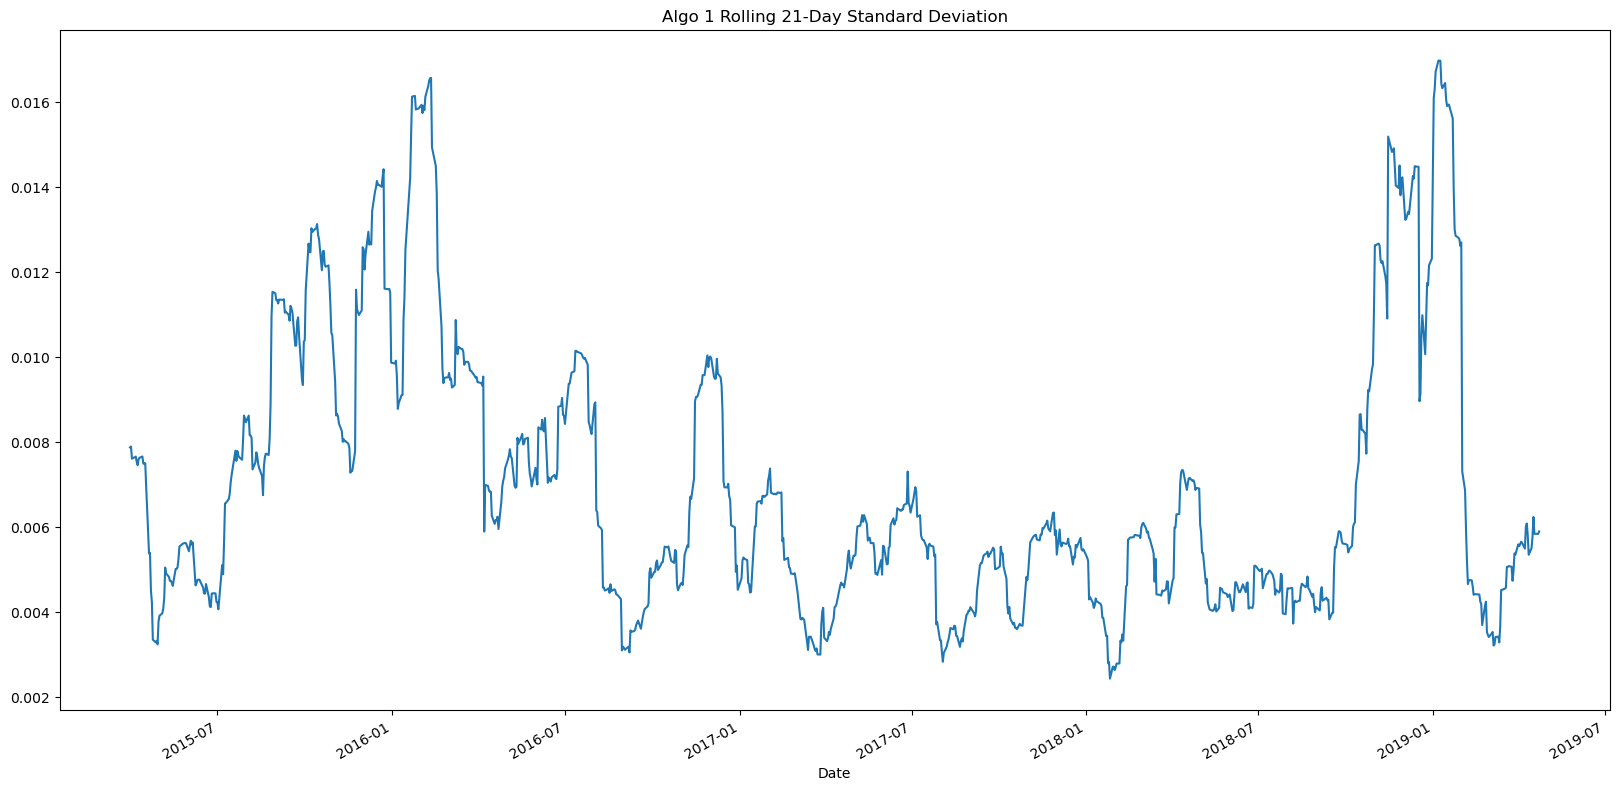

In [50]:
algo_1_sd21.plot(figsize=(20, 10), title='Algo 1 Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'Algo 2 Rolling 21-Day Standard Deviation'}, xlabel='Date'>

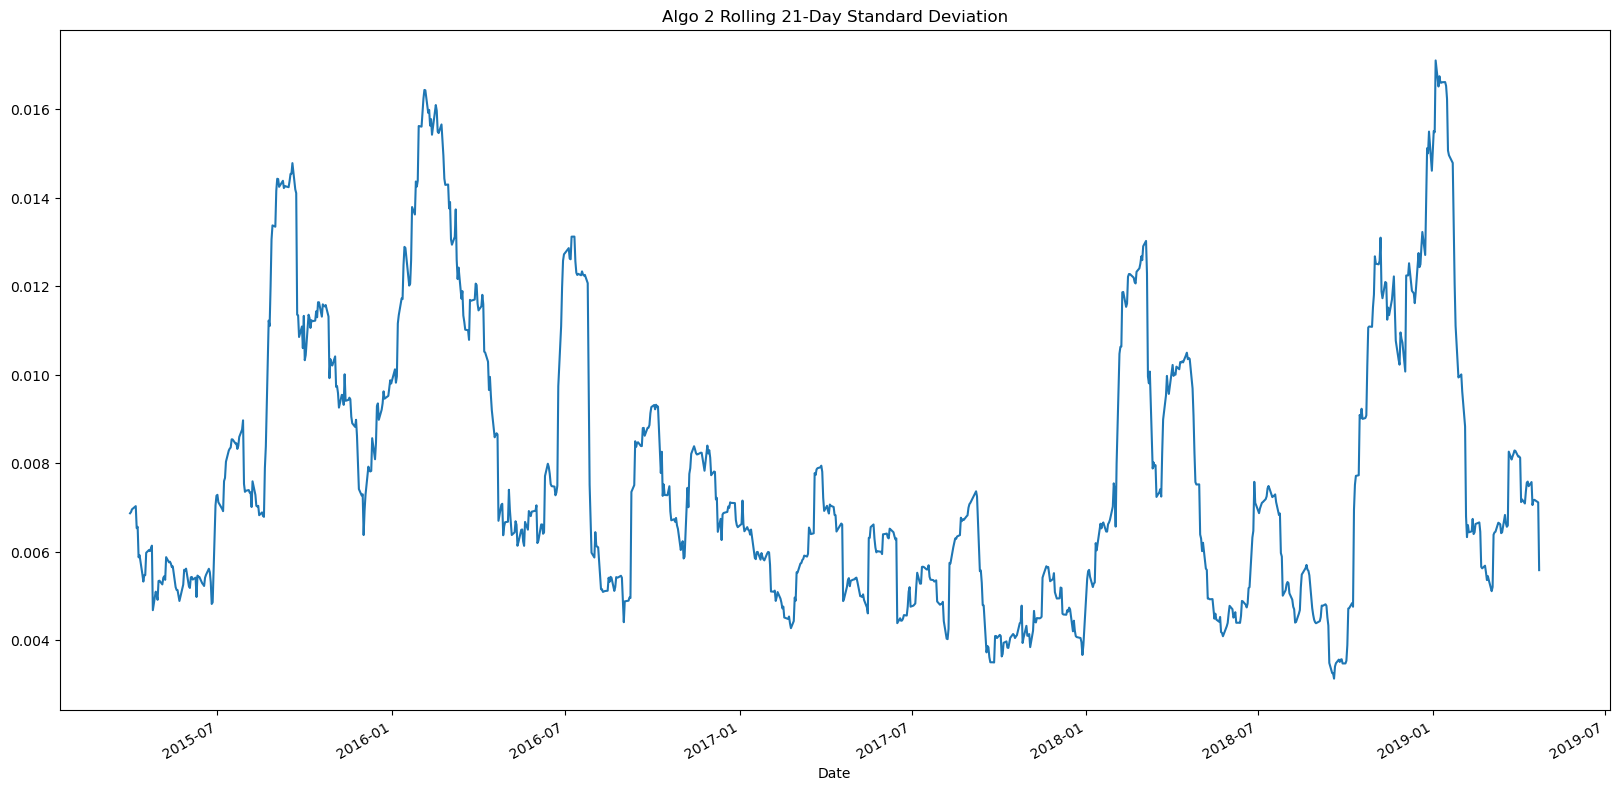

In [51]:
algo_2_sd21.plot(figsize=(20, 10), title='Algo 2 Rolling 21-Day Standard Deviation')

<AxesSubplot:title={'center':'S&P 500 Rolling 21-Day Standard Deviation'}, xlabel='Date'>

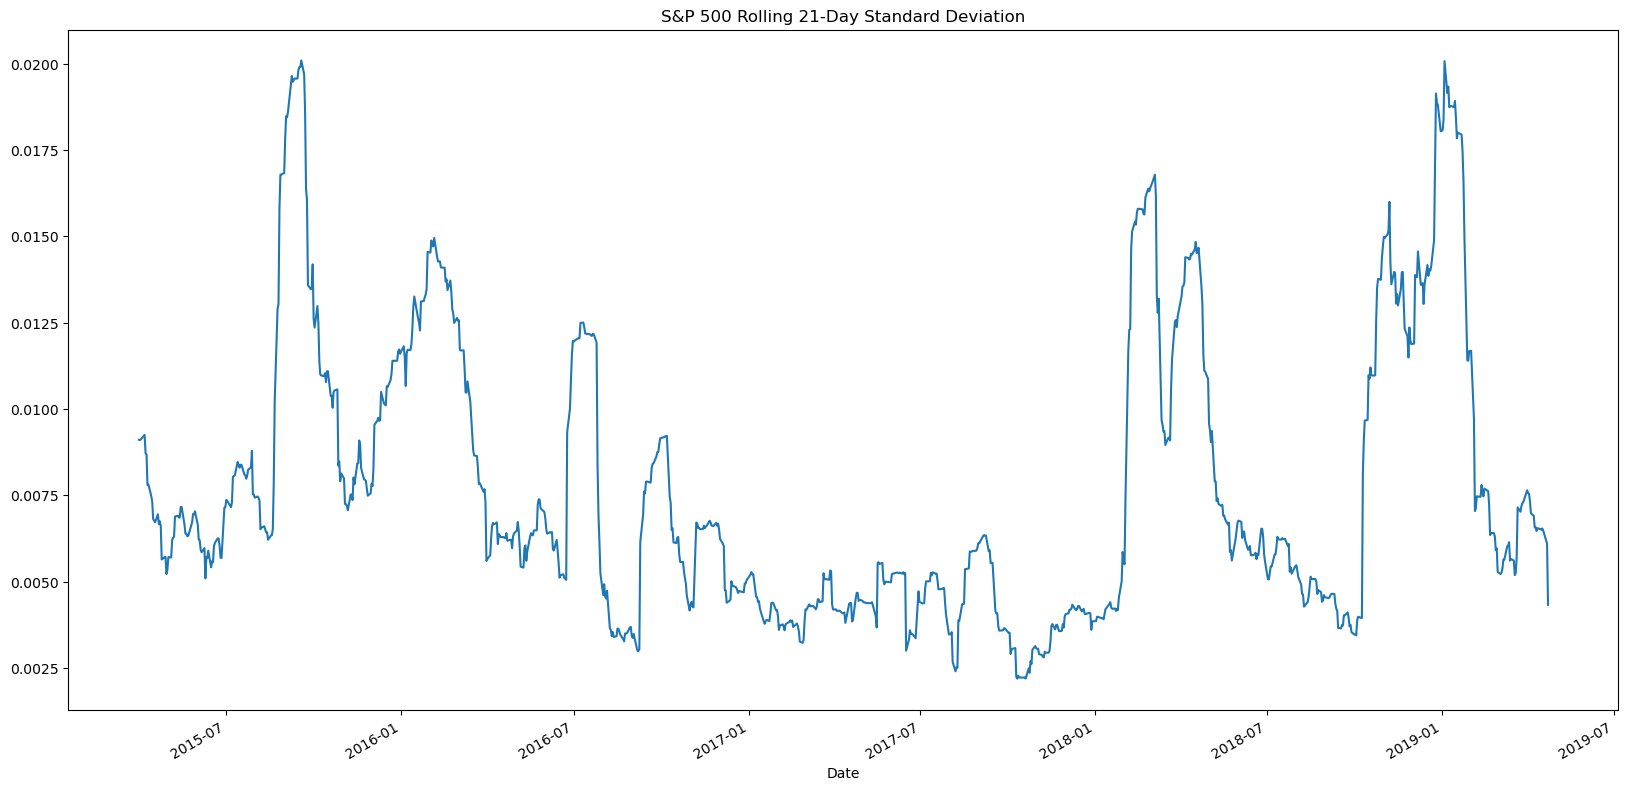

In [52]:
sp500_analysis_sd21.plot(figsize=(20, 10), title='S&P 500 Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [53]:
# Calculate the correlation
macro_correlations = macro_analysis_df.corr() 

macro_correlations


Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Soros      1.000000  0.699914  0.561243   0.754360  0.321211  0.826873   
Paulson    0.699914  1.000000  0.434479   0.545623  0.268840  0.678152   
Tiger      0.561243  0.434479  1.000000   0.424423  0.164387  0.507414   
Berkshire  0.754360  0.545623  0.424423   1.000000  0.292033  0.688082   
Algo_1     0.321211  0.268840  0.164387   0.292033  1.000000  0.288243   
Algo_2     0.826873  0.678152  0.507414   0.688082  0.288243  1.000000   
SP500      0.837864  0.669732  0.623946   0.751371  0.279494  0.858764   

              SP500  
Soros      0.837864  
Paulson    0.669732  
Tiger      0.623946  
Berkshire  0.751371  
Algo_1     0.279494  
Algo_2     0.858764  
SP500      1.000000

In [54]:
macro_correlations.mean().sort_values()

Algo_1       0.373458
Tiger        0.530842
Paulson      0.613820
Berkshire    0.636556
Algo_2       0.692504
Soros        0.714495
SP500        0.717310
dtype: float64

Algo_1       2.614209
Tiger        3.715893
Paulson      4.296740
Berkshire    4.455893
Algo_2       4.847528
Soros        5.001465
SP500        5.021171
dtype: float64

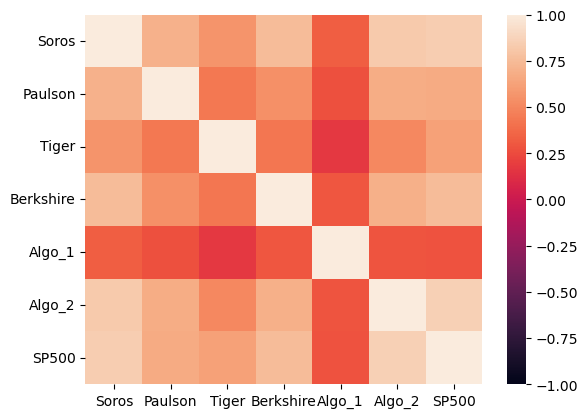

In [55]:
# Display the correlation matrix
sns.heatmap(macro_correlations, vmin=-1, vmax=1)
macro_correlations.sum(axis=0).sort_values()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Soros Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

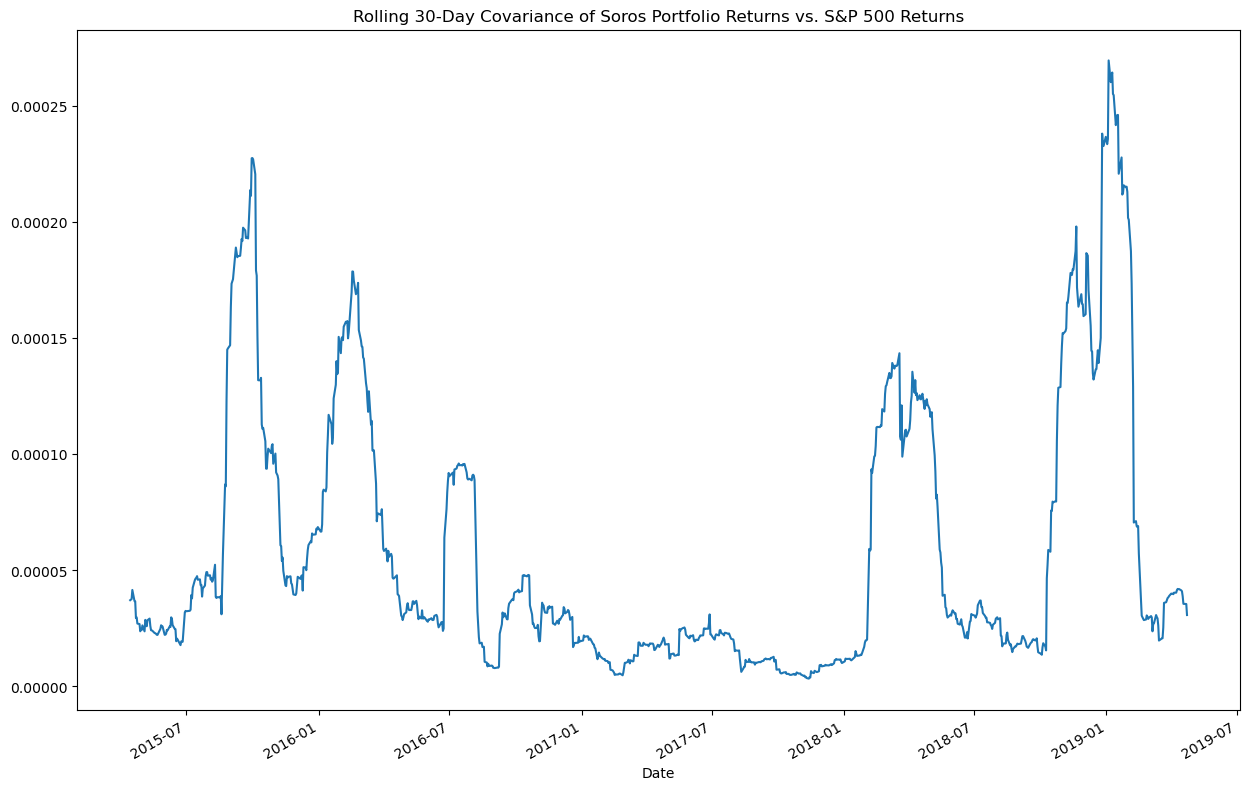

In [56]:
rolling_soros_covariance = macro_analysis_df['Soros'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_soros_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Soros Portfolio Returns vs. S&P 500 Returns')


<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Paulson Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

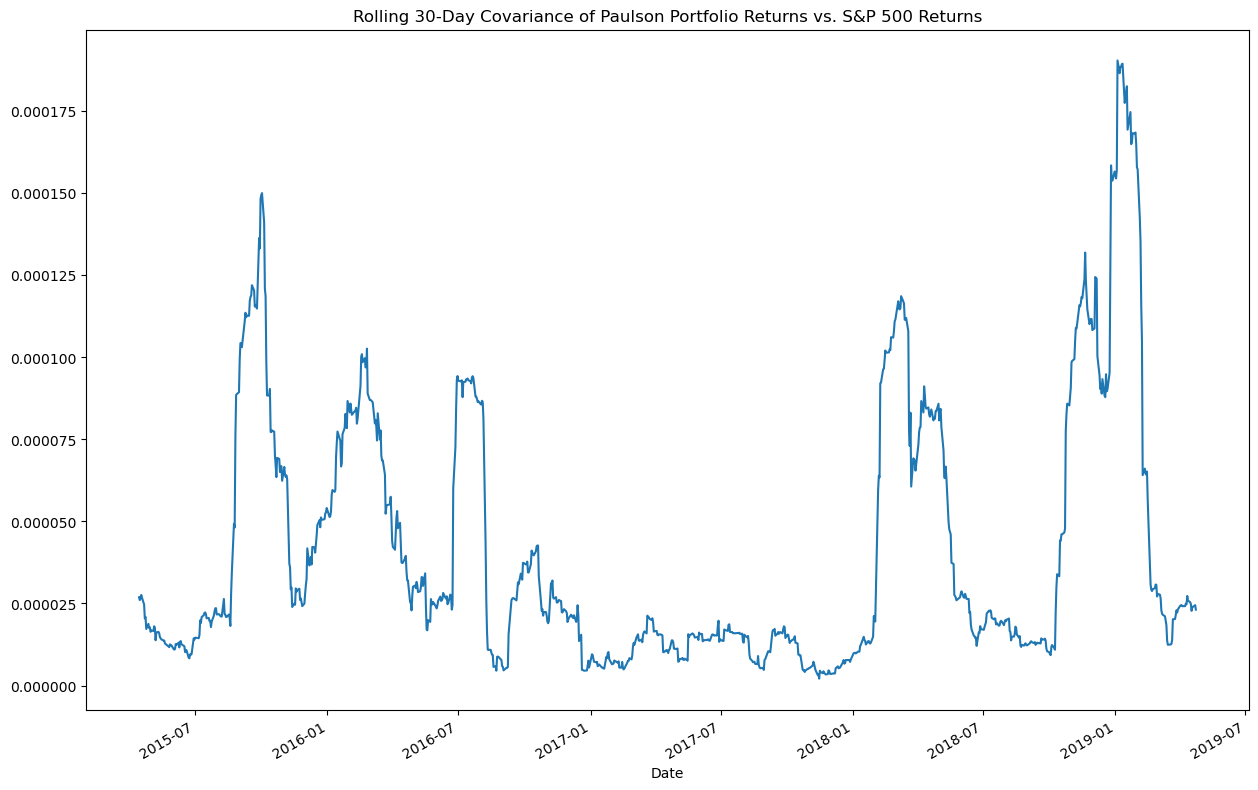

In [57]:
rolling_paulson_covariance = macro_analysis_df['Paulson'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_paulson_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Paulson Portfolio Returns vs. S&P 500 Returns')


<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Tiger Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

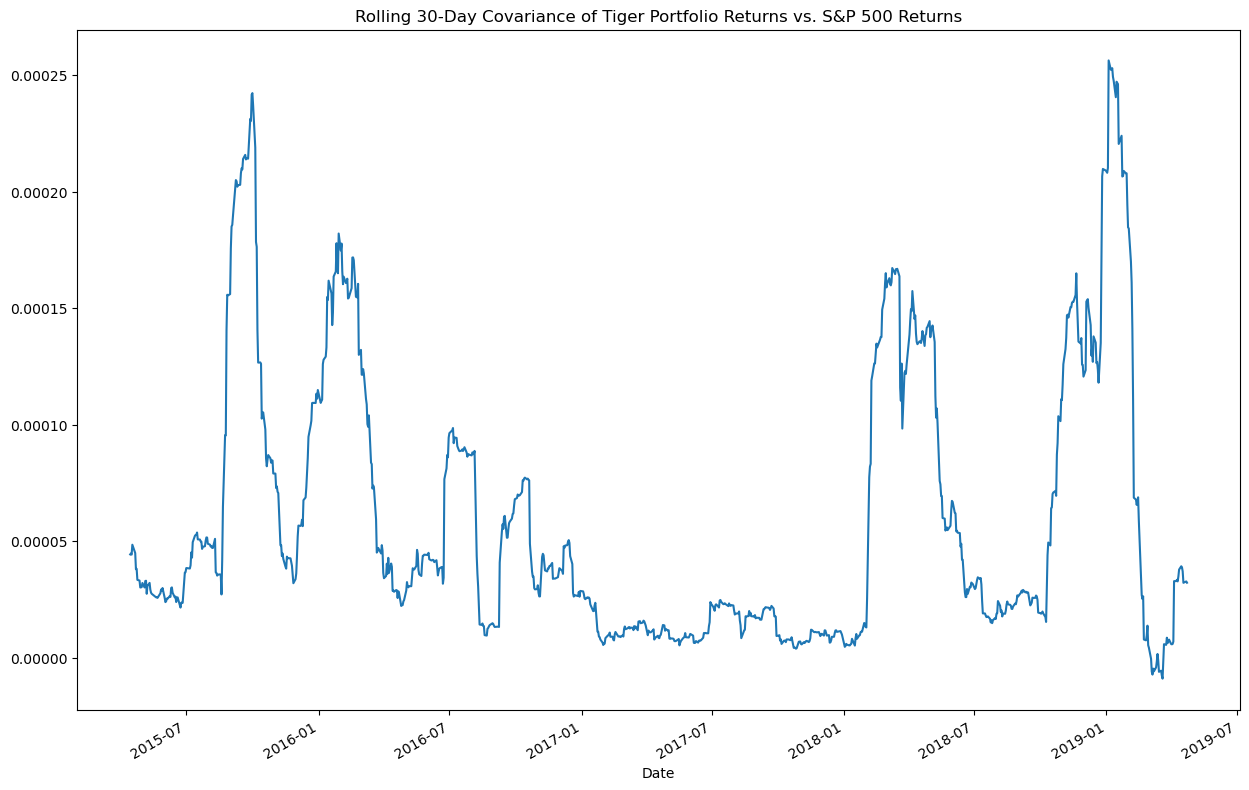

In [58]:
rolling_tiger_covariance = macro_analysis_df['Tiger'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_tiger_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Tiger Portfolio Returns vs. S&P 500 Returns')


<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Berkshire Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

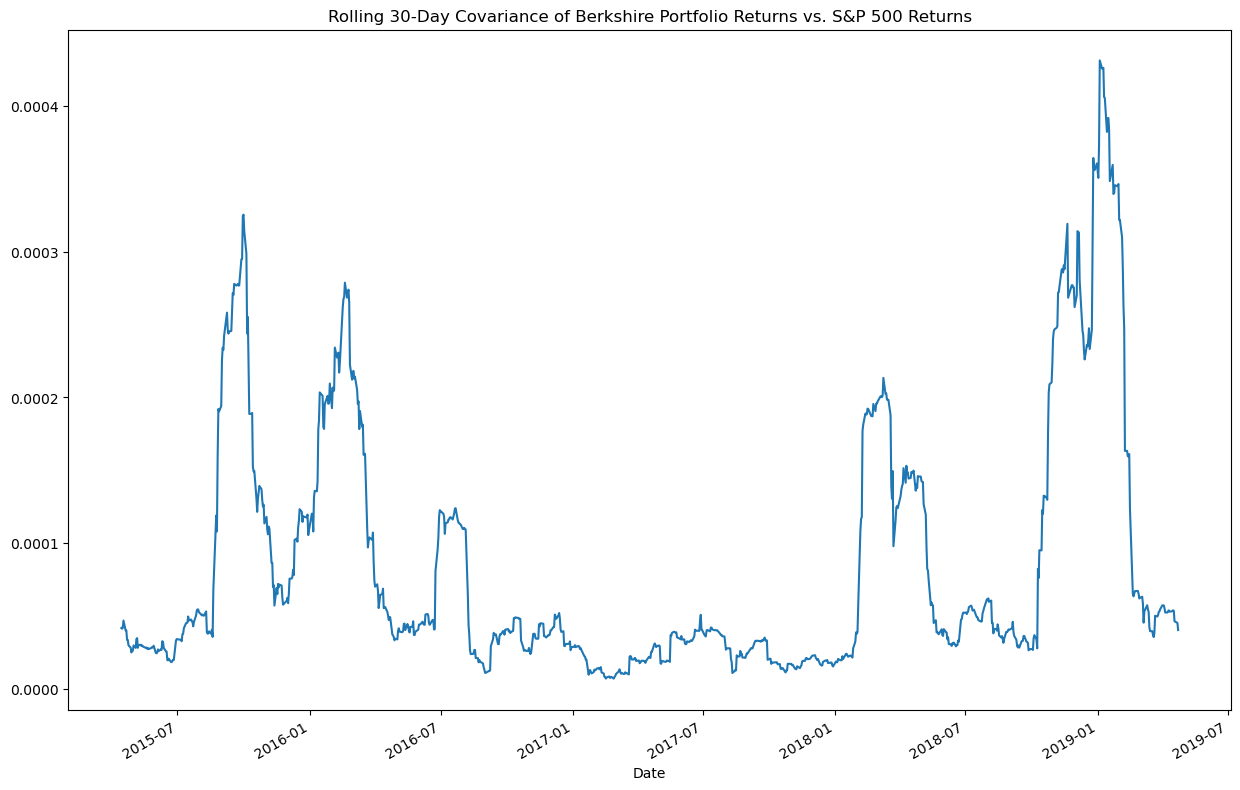

In [59]:
rolling_berkshire_covariance = macro_analysis_df['Berkshire'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_berkshire_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Berkshire Portfolio Returns vs. S&P 500 Returns')


<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo_1 Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

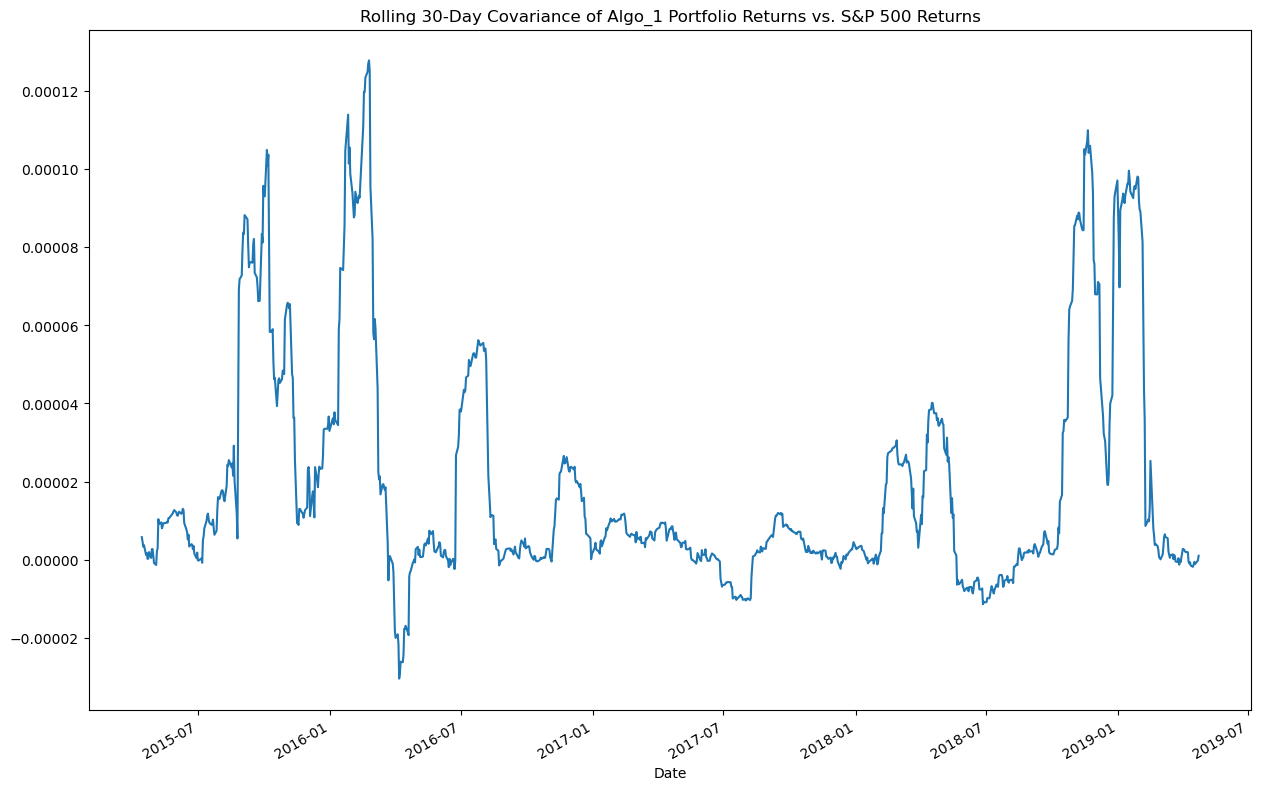

In [60]:
rolling_algo_1_covariance = macro_analysis_df['Algo_1'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_algo_1_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Algo_1 Portfolio Returns vs. S&P 500 Returns')


7.316632424648712e-05

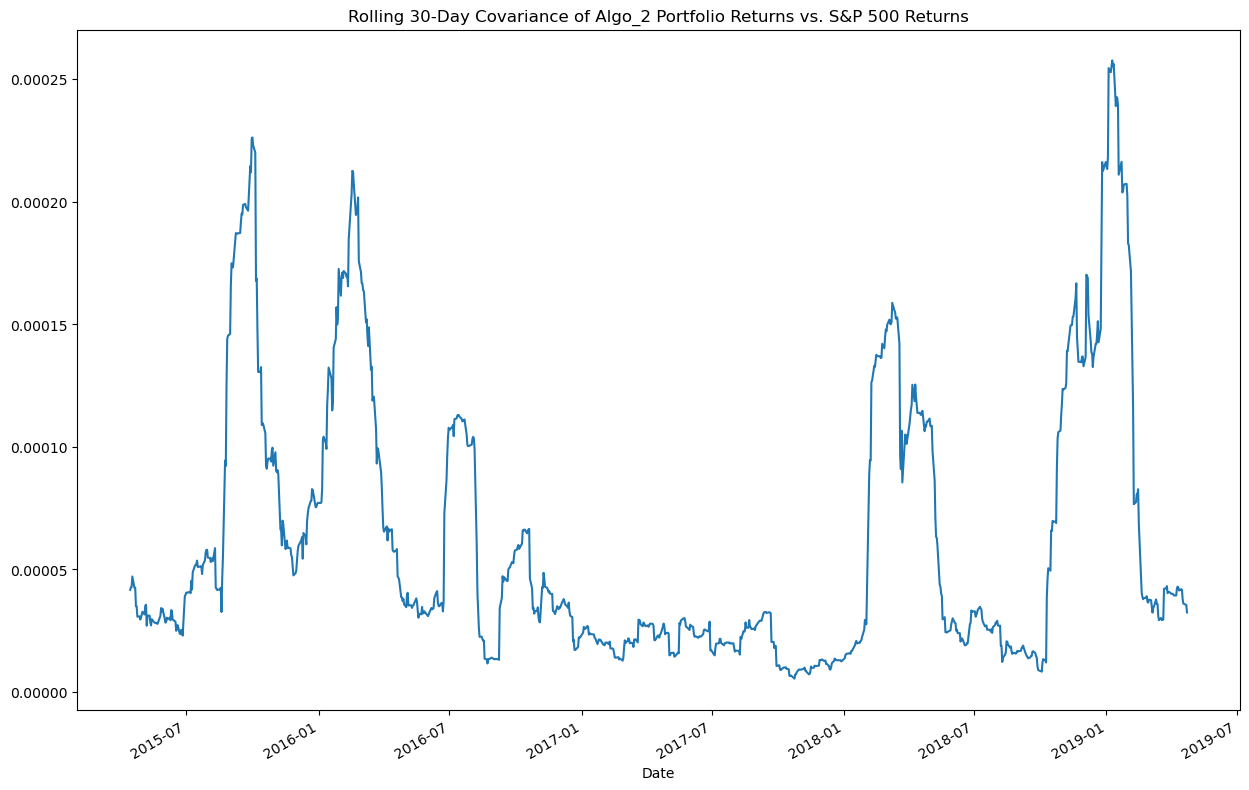

In [61]:
rolling_algo_2_covariance = macro_analysis_df['Algo_2'].rolling(window=30).cov(macro_analysis_df['SP500'])
rolling_algo_2_covariance.plot(figsize=(15, 10), title='Rolling 30-Day Covariance of Algo_2 Portfolio Returns vs. S&P 500 Returns')

# Calculate variance of S&P 500
variance = macro_analysis_df['SP500'].var()
variance

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

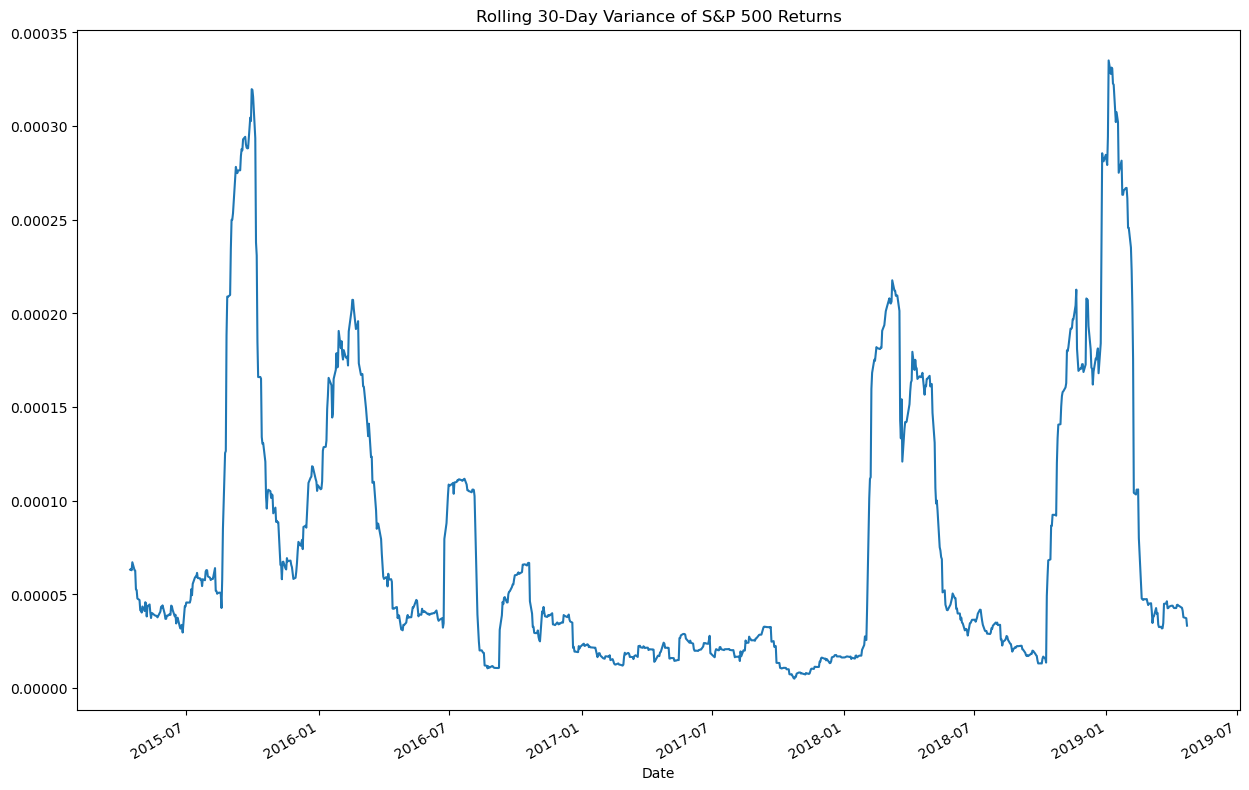

In [62]:
rolling_variance = macro_analysis_df['SP500'].rolling(window=30).var()
rolling_variance.plot(figsize=(15, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros Portfolio'}, xlabel='Date'>

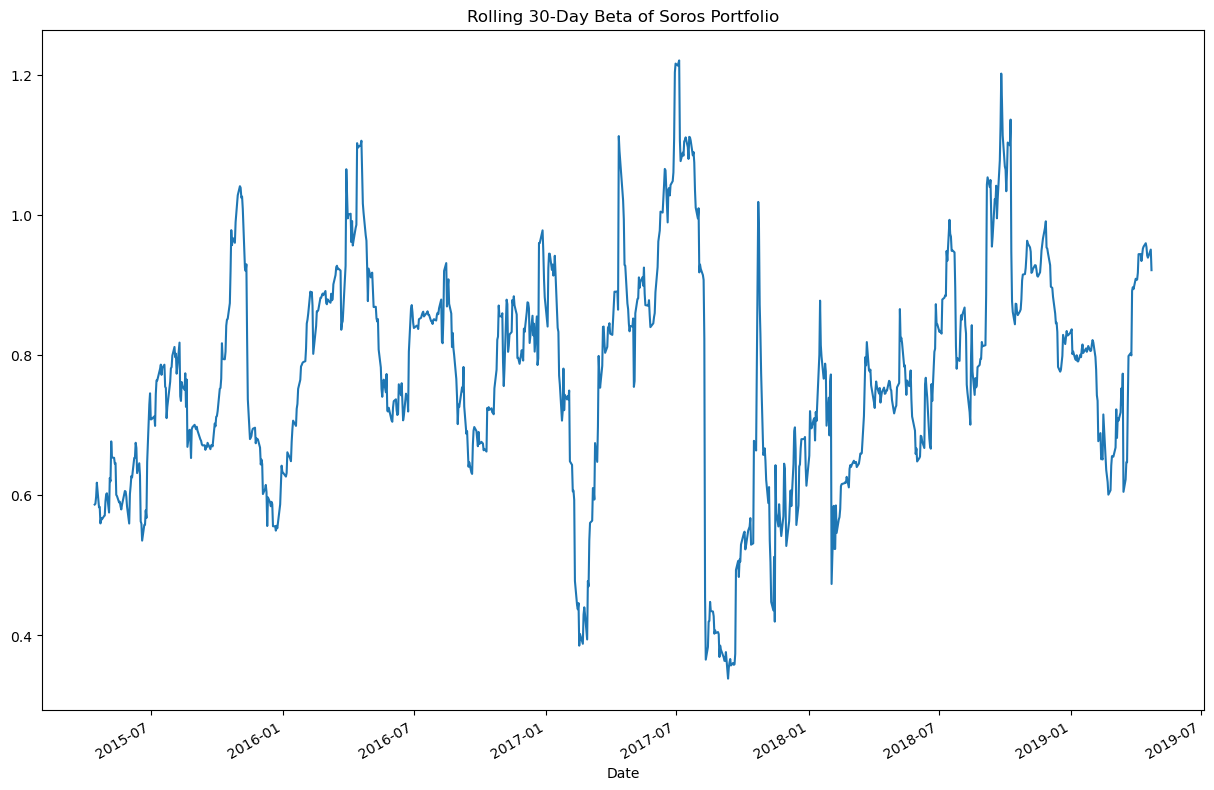

In [63]:
# Computing Beta
rolling_soros_beta = rolling_soros_covariance / rolling_variance
rolling_soros_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Soros Portfolio")


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Paulson Portfolio'}, xlabel='Date'>

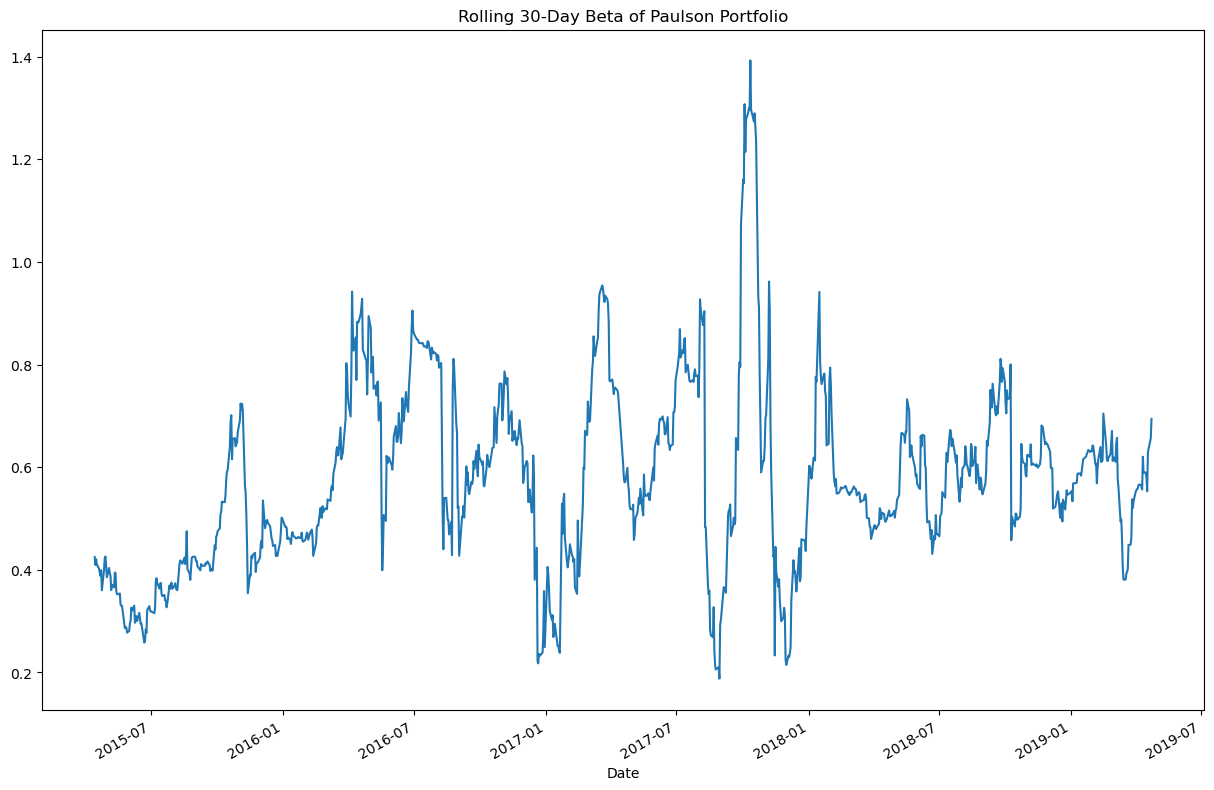

In [64]:
rolling_paulson_beta = rolling_paulson_covariance / rolling_variance
rolling_paulson_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Paulson Portfolio")


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Tiger Portfolio'}, xlabel='Date'>

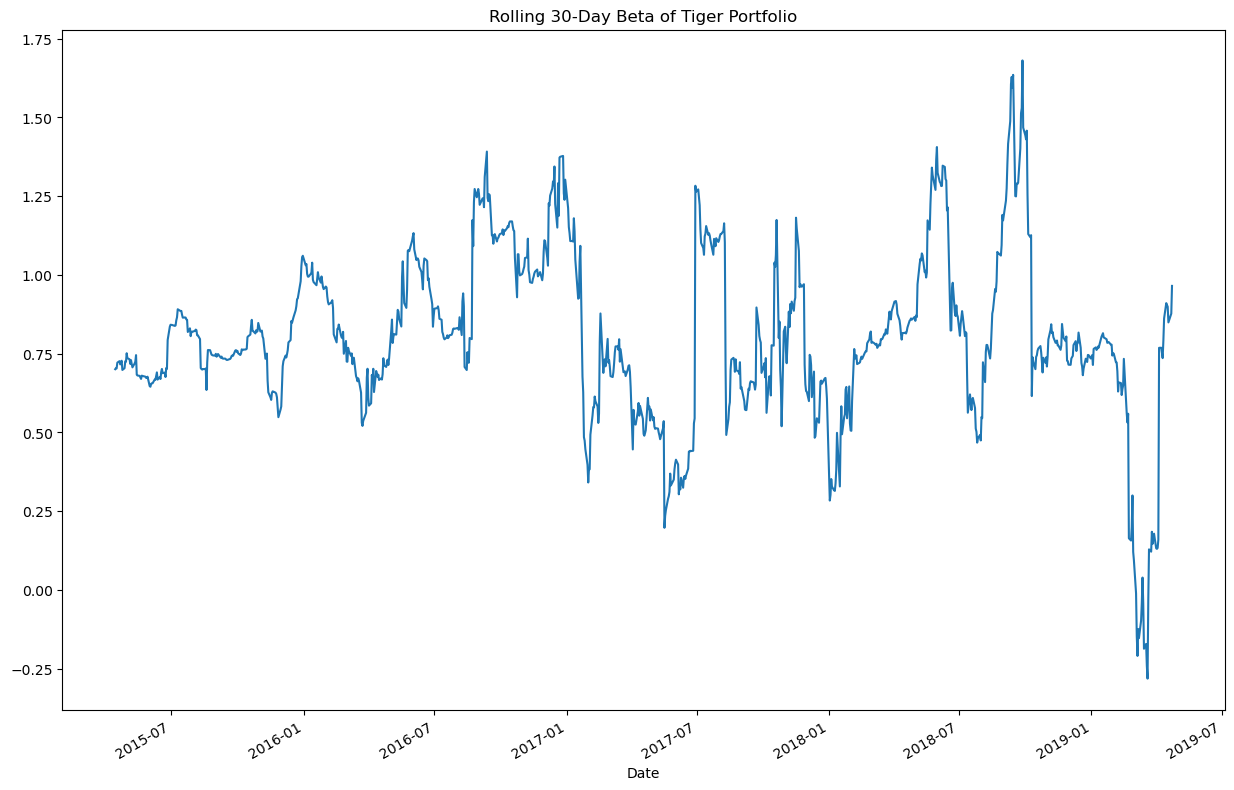

In [65]:
rolling_tiger_beta = rolling_tiger_covariance / rolling_variance
rolling_tiger_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Tiger Portfolio")
                        

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Berkshire Portfolio'}, xlabel='Date'>

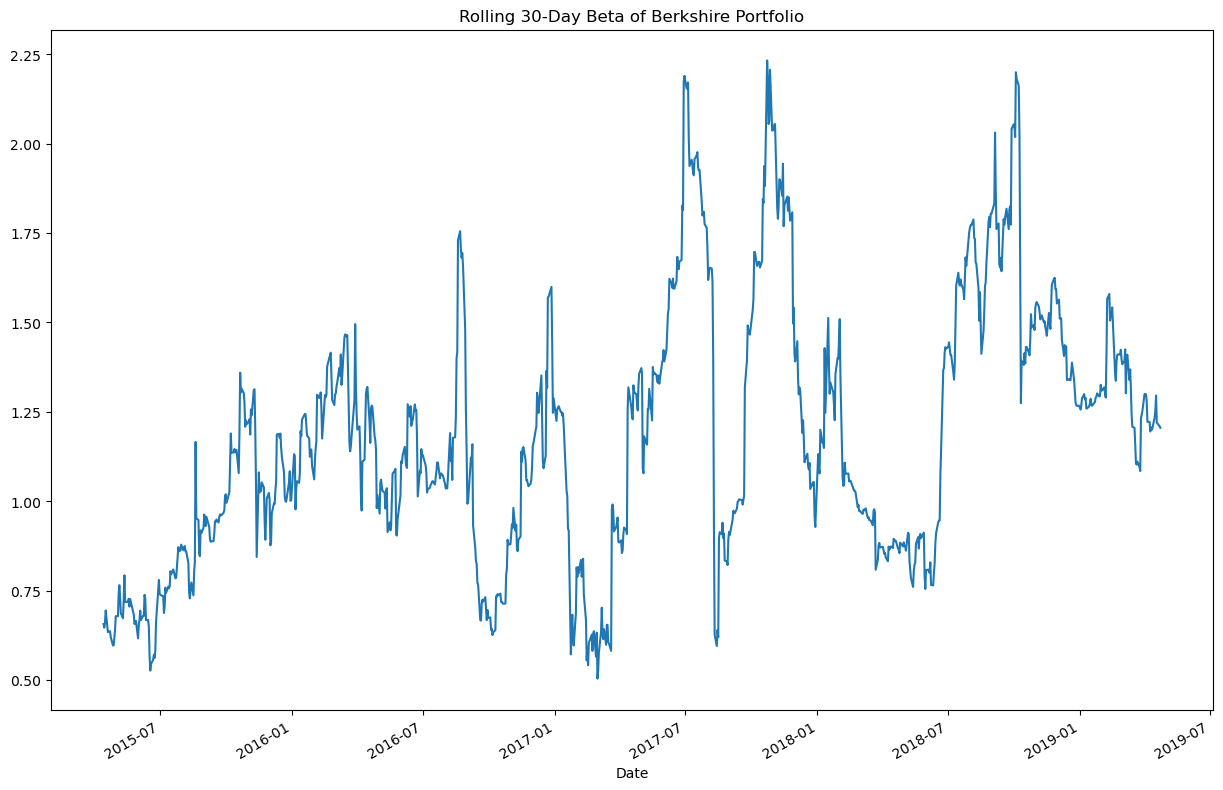

In [66]:
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance
rolling_berkshire_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Berkshire Portfolio")
                            

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo_1 Portfolio'}, xlabel='Date'>

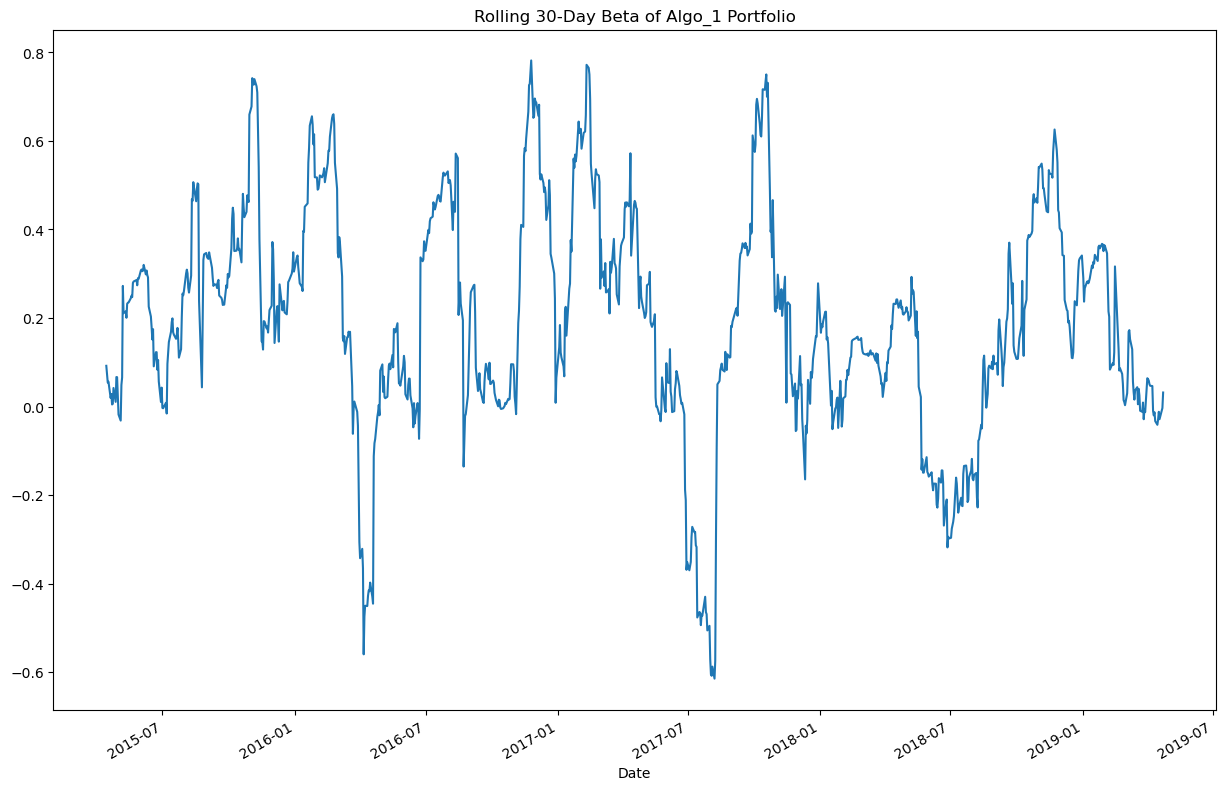

In [67]:
rolling_algo_1_beta = rolling_algo_1_covariance / rolling_variance
rolling_algo_1_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Algo_1 Portfolio")
                         

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo_2 Portfolio'}, xlabel='Date'>

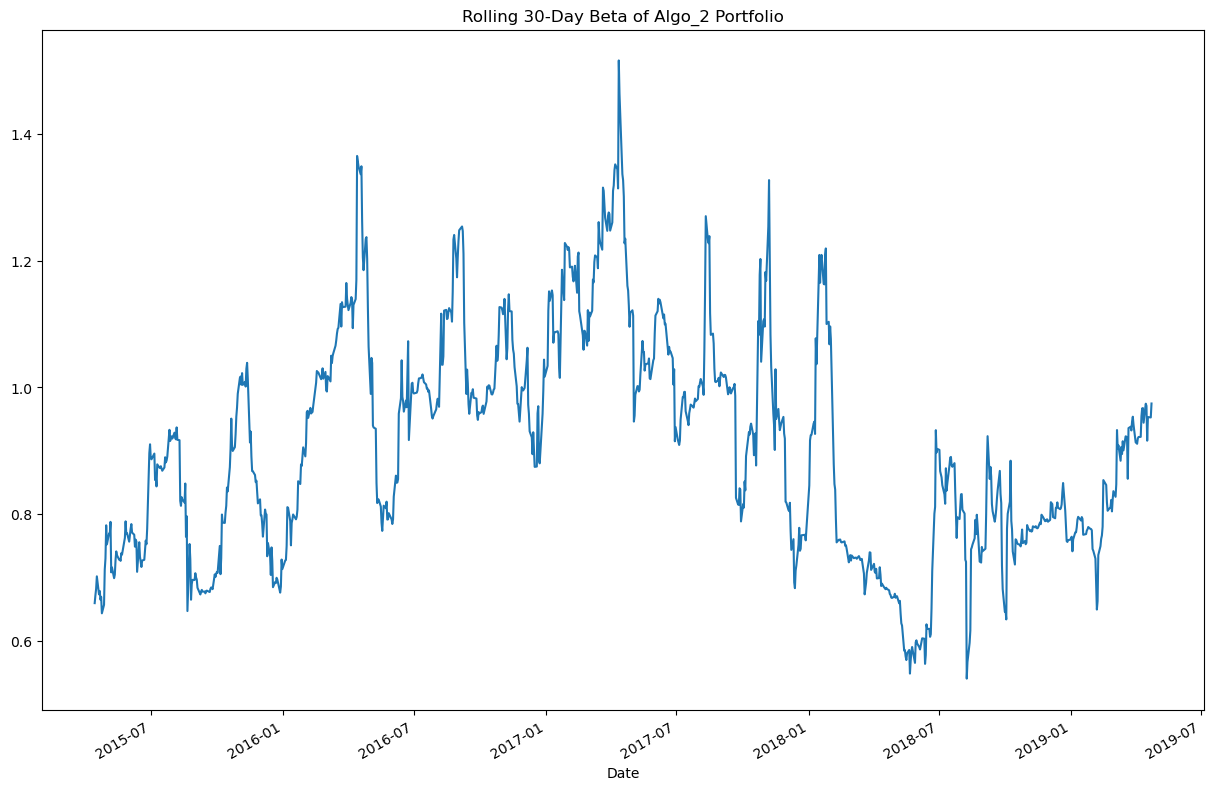

In [68]:
rolling_algo_2_beta = rolling_algo_2_covariance / rolling_variance
rolling_algo_2_beta.plot(figsize=(15, 10), title="Rolling 30-Day Beta of Algo_2 Portfolio")


In [69]:
soros_beta = round(rolling_soros_beta.mean(), 2)
paulson_beta = round(rolling_paulson_beta.mean(), 2)
tiger_beta = round(rolling_tiger_beta.mean(), 2)
berkshire_beta = round(rolling_berkshire_beta.mean(), 2)
algo_1_beta = round(rolling_algo_1_beta.mean(), 2)
algo_2_beta = round(rolling_algo_2_beta.mean(), 2)

print('Soros rolling beta mean is', soros_beta)
print('Paulson rolling beta mean is', paulson_beta)
print('Tiger rolling beta mean is', tiger_beta)
print('Berkshire rolling beta mean is', berkshire_beta)
print('Algo_1 rolling beta mean is', algo_1_beta)
print('Algo_2 rolling beta mean is', algo_2_beta)


Soros rolling beta mean is 0.77
Paulson rolling beta mean is 0.58
Tiger rolling beta mean is 0.8
Berkshire rolling beta mean is 1.18
Algo_1 rolling beta mean is 0.19
Algo_2 rolling beta mean is 0.91


### Summary of Dyanmic Volatility, Correlation and Beta Analysis:


##### Portfolio Risk Summary (~48.5 months 3-3-15 to 4-23-19):

* Rolling 21-day standard deviation is a very volatile measure that does not clearly show the winning portfolio

* The correlation matrix and beta means show us trends on portfolio preferences although these metrics cannot be used in isolation

* Prefer a portfolio with a lower correlation to the S&P, although we cannot evaluate performance by correlation alone

1. Algo 1
2. Tiger
3. Paulson
4. Berkshire
5. Soros
6. Algo 2

* Prefer a portfolio with a lower beta, although we cannot evaluate performance by beta alone

1. Algo 1
2. Paulson
3. Soros
4. Tiger
5. Algo 2
6. Berkshire

* We need to utilize the sharpe ratio to aggregate returns and volatility to isolate the best portfolio 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

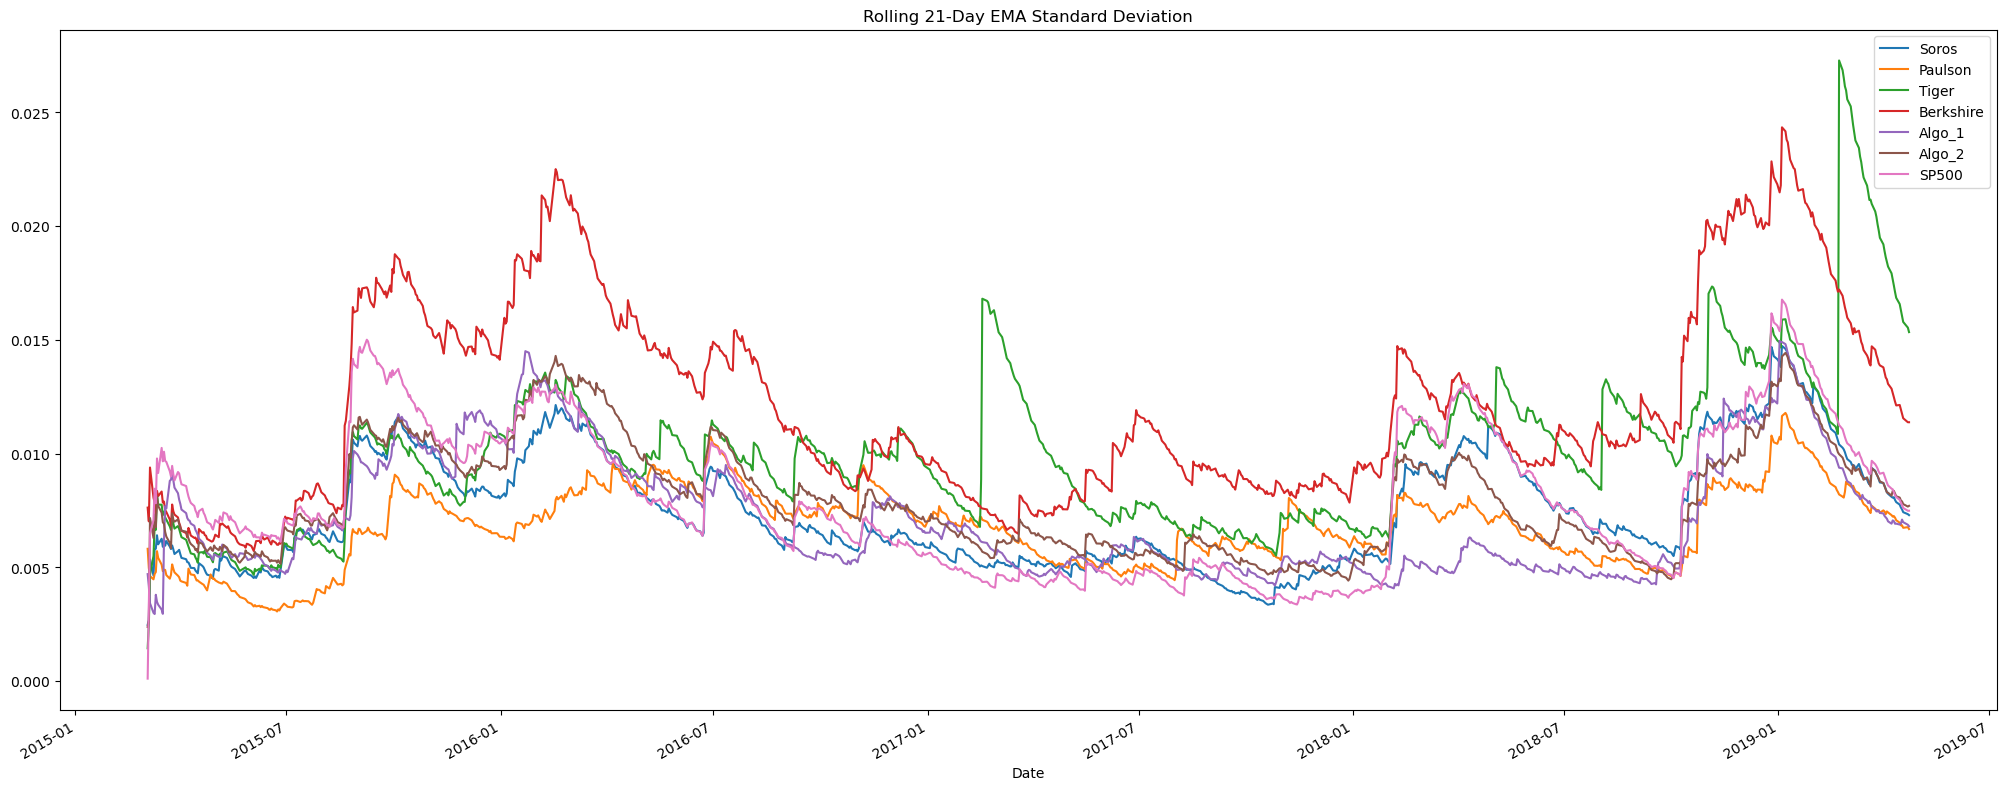

In [70]:
# Use `ewm` to calculate the rolling window

# Calculate the rolling standard deviation for all portfolios using a 21-day window
macro_ewmstd_21 = macro_analysis_df.ewm(halflife=21).std().plot(figsize=(25,10), title='Rolling 21-Day EMA Standard Deviation')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [71]:
# Annualized Sharpe Ratios
sharpe_ratios = ((macro_analysis_df.mean())*252)/ (macro_analysis_df.std()*np.sqrt(252))
sharpe_ratios     

Soros        0.356417
Paulson     -0.483570
Tiger       -0.121060
Berkshire    0.621810
Algo_1       1.378648
Algo_2       0.501364
SP500        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

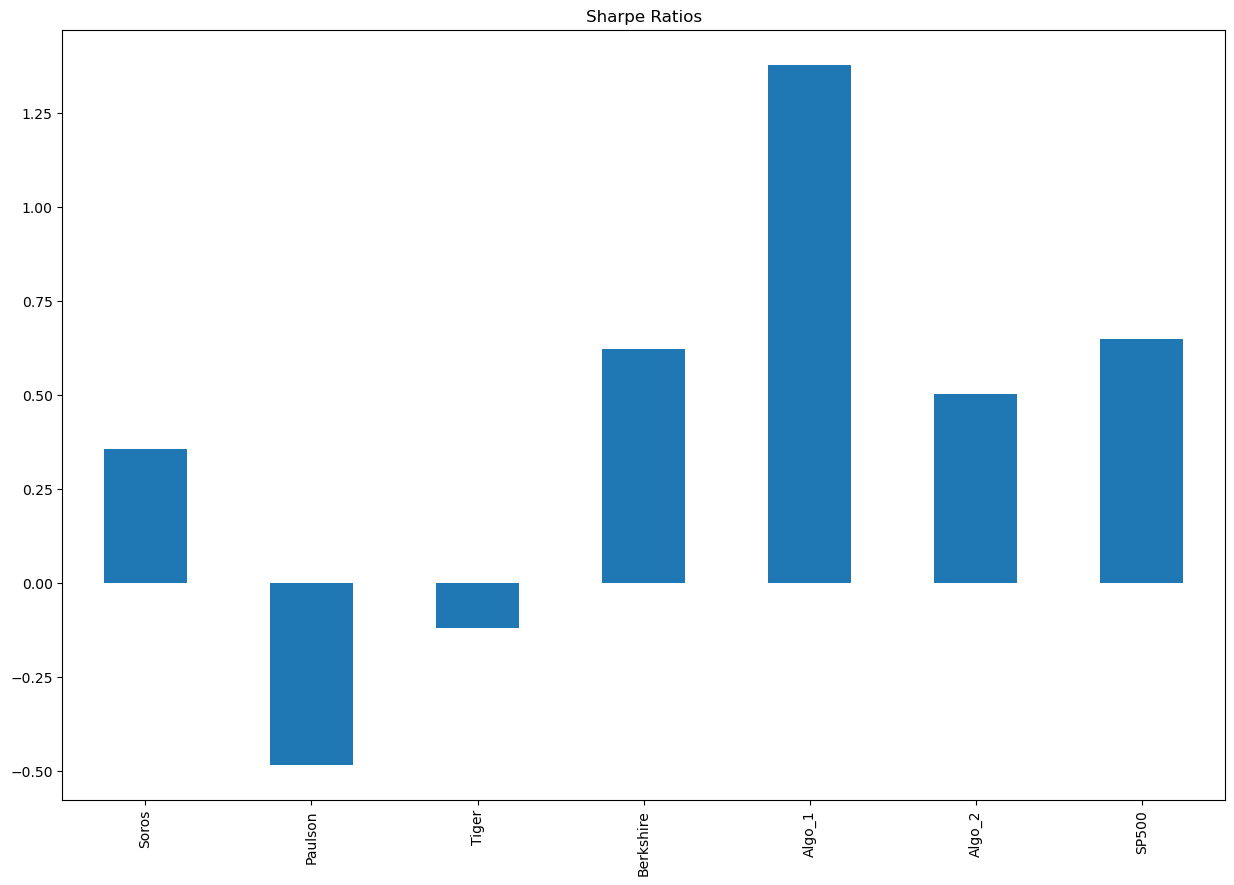

In [72]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(15,10), title='Sharpe Ratios')

### Portfolio Analysis Summary

##### Final Summary (~48.5 months 3-3-15 to 4-23-19):

* In summary, we do see clear winning and losing portfolios when analyzing returns, volatility, correlations, beta and the sharpe ratio

* Based on the sharpe ratio which is a good metric to summarize returns per unit of risk taken, we can rank order the best portfolios

1. Algo 1
2. Berkshire
3. Algo 2
4. Soros
5. Tiger
6. Paulson

* Algo 1 is the best portfolio and the only portfolio to beat the S&P 500


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [73]:
# Reading data from 1st stock
nvda_csv_path = Path("../Resources/nvda_google_finance.csv")
nvda_df = pd.read_csv(nvda_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_df

Close
Date             
2015-03-03   5.55
2015-03-04   5.61
2015-03-05   5.72
2015-03-06   5.64
2015-03-09   5.65
...           ...
2019-04-16  47.05
2019-04-17  46.82
2019-04-18  46.58
2019-04-22  47.12
2019-04-23  47.67

[1043 rows x 1 columns]

In [74]:
# Reading data from 2nd stock
cof_csv_path = Path("../Resources/cof_google_finance.csv")
cof_df = pd.read_csv(cof_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
cof_df

Close
Date             
2015-03-03  79.14
2015-03-04  78.65
2015-03-05  78.89
2015-03-06  78.98
2015-03-09  79.84
...           ...
2019-04-16  87.91
2019-04-17  87.92
2019-04-18  88.11
2019-04-22  87.61
2019-04-23  88.19

[1043 rows x 1 columns]

In [75]:
# Reading data from 3rd stock
orcl_csv_path = Path("../Resources/orcl_google_finance.csv")
orcl_df = pd.read_csv(orcl_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
orcl_df


Close
Date             
2015-03-03  43.38
2015-03-04  43.61
2015-03-05  43.80
2015-03-06  42.38
2015-03-09  42.69
...           ...
2019-04-16  54.59
2019-04-17  54.48
2019-04-18  54.52
2019-04-22  54.62
2019-04-23  54.94

[1043 rows x 1 columns]

In [76]:
# Reading data from 4th stock
amzn_csv_path = Path("../Resources/amzn_google_finance.csv")
amzn_df = pd.read_csv(amzn_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df

Close
Date             
2015-03-03  19.23
2015-03-04  19.14
2015-03-05  19.39
2015-03-06  19.00
2015-03-09  18.93
...           ...
2019-04-16  93.15
2019-04-17  93.24
2019-04-18  93.08
2019-04-22  94.37
2019-04-23  96.19

[1043 rows x 1 columns]

In [77]:
# Reading data from 5th stock
msft_csv_path = Path("../Resources/msft_google_finance.csv")
msft_df = pd.read_csv(msft_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
msft_df


Close
Date              
2015-03-03   43.28
2015-03-04   43.06
2015-03-05   43.11
2015-03-06   42.36
2015-03-09   42.85
...            ...
2019-04-16  120.77
2019-04-17  121.77
2019-04-18  123.37
2019-04-22  123.76
2019-04-23  125.44

[1043 rows x 1 columns]

In [78]:
columns = ["NVDA"]
nvda_df.columns = columns

columns = ["COF"]
cof_df.columns = columns

columns = ["ORCL"]
orcl_df.columns = columns

columns = ["AMZN"]
amzn_df.columns = columns

columns = ["MSFT"]
msft_df.columns = columns

In [79]:
# Combine all stocks in a single DataFrame
custom_analysis_df = pd.concat([nvda_df,  cof_df, orcl_df, amzn_df, msft_df], axis="columns", join="inner")
custom_analysis_df

NVDA    COF   ORCL   AMZN    MSFT
Date                                          
2015-03-03   5.55  79.14  43.38  19.23   43.28
2015-03-04   5.61  78.65  43.61  19.14   43.06
2015-03-05   5.72  78.89  43.80  19.39   43.11
2015-03-06   5.64  78.98  42.38  19.00   42.36
2015-03-09   5.65  79.84  42.69  18.93   42.85
...           ...    ...    ...    ...     ...
2019-04-16  47.05  87.91  54.59  93.15  120.77
2019-04-17  46.82  87.92  54.48  93.24  121.77
2019-04-18  46.58  88.11  54.52  93.08  123.37
2019-04-22  47.12  87.61  54.62  94.37  123.76
2019-04-23  47.67  88.19  54.94  96.19  125.44

[1043 rows x 5 columns]

In [80]:
# Calculate daily returns
daily_returns = custom_analysis_df.pct_change()


In [81]:
daily_returns

NVDA       COF      ORCL      AMZN      MSFT
Date                                                        
2015-03-03       NaN       NaN       NaN       NaN       NaN
2015-03-04  0.010811 -0.006192  0.005302 -0.004680 -0.005083
2015-03-05  0.019608  0.003051  0.004357  0.013062  0.001161
2015-03-06 -0.013986  0.001141 -0.032420 -0.020113 -0.017397
2015-03-09  0.001773  0.010889  0.007315 -0.003684  0.011568
...              ...       ...       ...       ...       ...
2019-04-16  0.018839  0.011855 -0.000732  0.009866 -0.002313
2019-04-17 -0.004888  0.000114 -0.002015  0.000966  0.008280
2019-04-18 -0.005126  0.002161  0.000734 -0.001716  0.013140
2019-04-22  0.011593 -0.005675  0.001834  0.013859  0.003161
2019-04-23  0.011672  0.006620  0.005859  0.019286  0.013575

[1043 rows x 5 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [82]:
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
portfolio_returns_df = daily_returns.dot(weights)

cumulative_returns_df = (1 + portfolio_returns_df).cumprod()

# Display sample data
portfolio_returns_df

Date
2015-03-03         NaN
2015-03-04    0.000032
2015-03-05    0.008248
2015-03-06   -0.016555
2015-03-09    0.005572
                ...   
2019-04-16    0.007503
2019-04-17    0.000491
2019-04-18    0.001839
2019-04-22    0.004955
2019-04-23    0.011402
Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

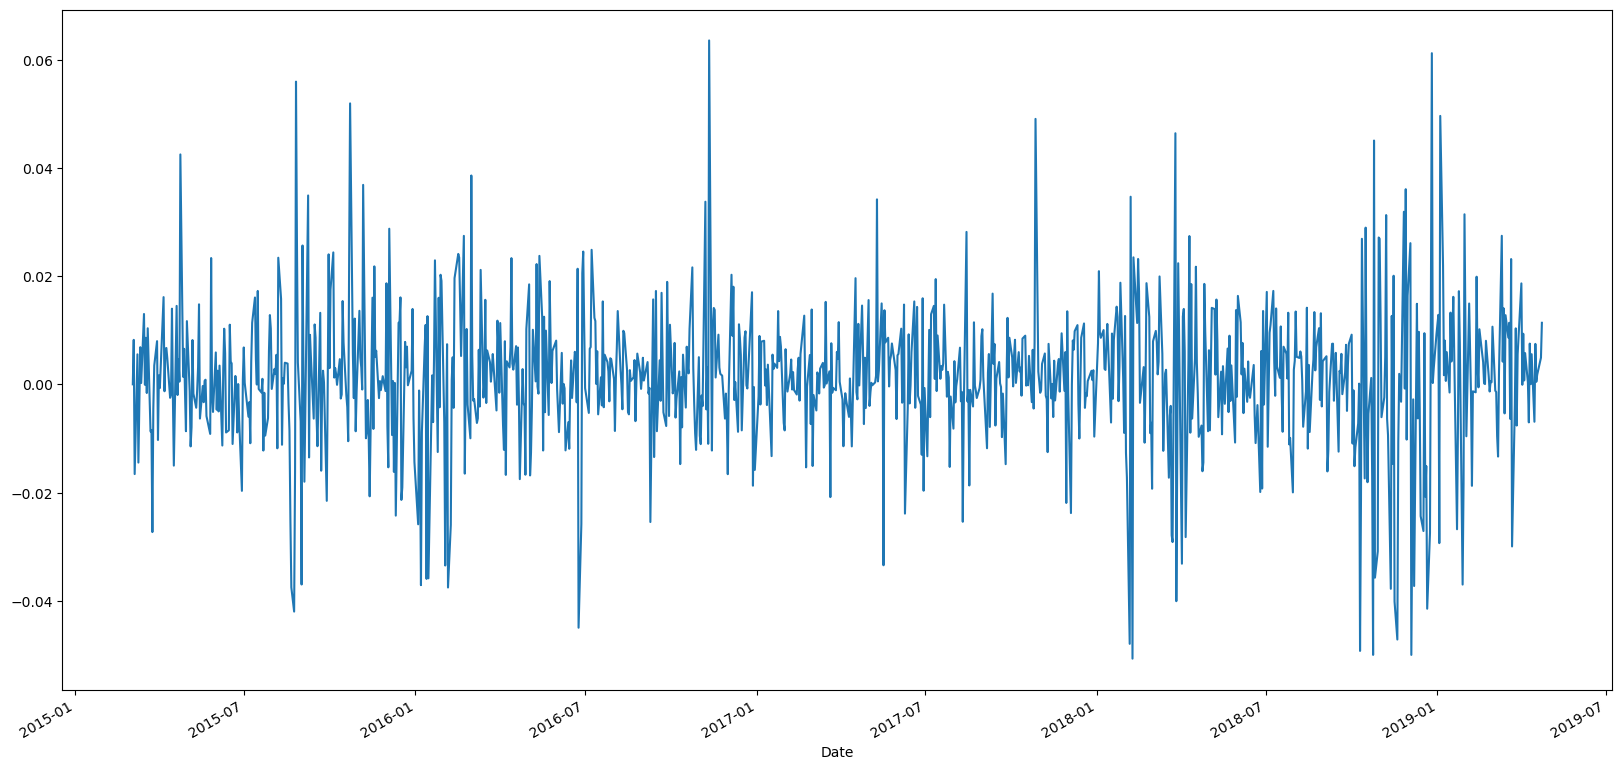

In [83]:
# Use the `plot` function to plot the cumulative portfolio returns
portfolio_returns_df.plot(figsize=(20, 10))

In [84]:
cumulative_returns_df

Date
2015-03-03         NaN
2015-03-04    1.000032
2015-03-05    1.008280
2015-03-06    0.991587
2015-03-09    0.997112
                ...   
2019-04-16    3.025540
2019-04-17    3.027027
2019-04-18    3.032592
2019-04-22    3.047617
2019-04-23    3.082367
Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

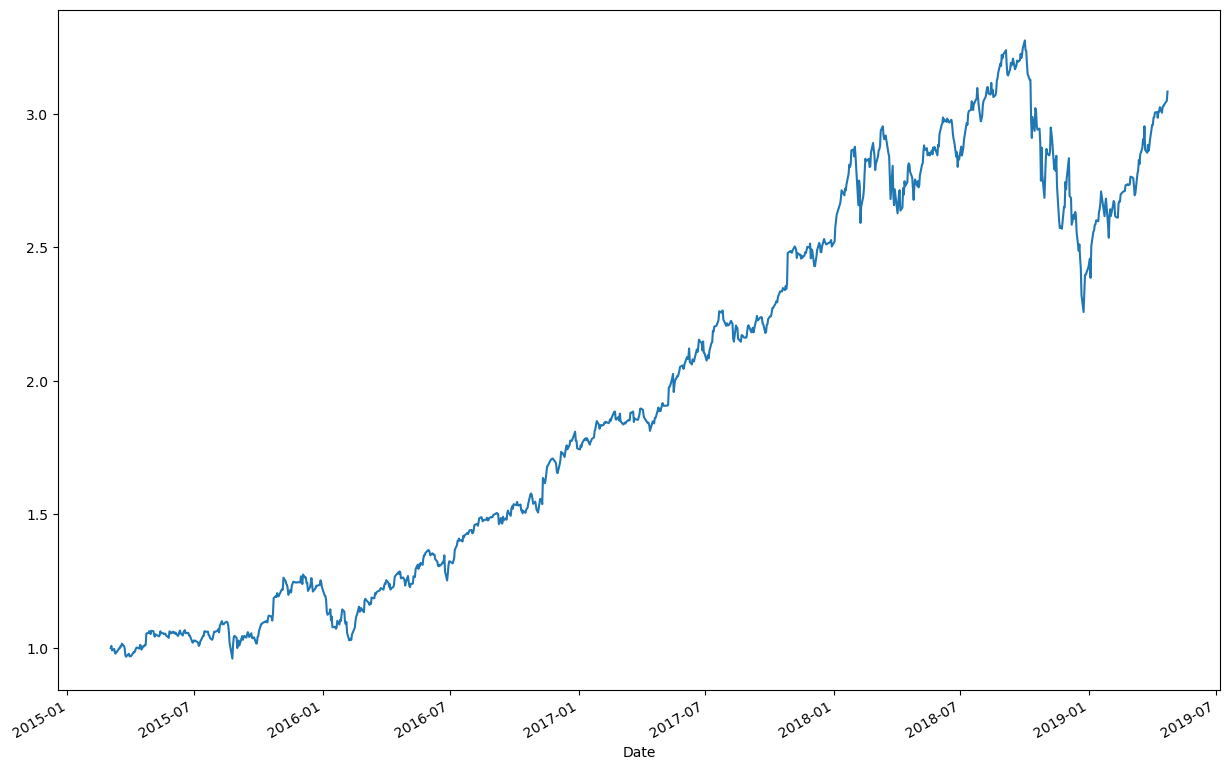

In [85]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns_df.plot(figsize=(15,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
all_port_returns_df = pd.concat([macro_analysis_df, portfolio_returns_df], axis="columns", join="inner")
all_port_returns_df

Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.002230  0.003241 -0.002534   0.004213 -0.008589  0.002416   
2015-03-05  0.004016  0.004076  0.002355   0.006726 -0.000955  0.004323   
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098 -0.004957 -0.011460   
2015-03-09  0.000582  0.004225  0.005843  -0.001652 -0.005447  0.001303   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   
2019-04-23  0.007167  0.003485  0.006472   0.013278  0.004969  0.009622   

               SP500         0  
Date                            
2015-03-03 -0.004539       NaN  
2015-03-04 -0.004389  0.000032  
2015-03-05  0.001196  0.008248  
2015-03-06 -0.014174 -0.016555  
2015-03-09  0.003944  0.005572  
...              ...       ...  
2019-04-16  0.000509  0.007503  
2019-04-17 -0.002274  0.000491  
2019-04-18  0.001579  0.001839  
2019-04-22  0.001012  0.004955  
2019-04-23  0.008841  0.011402  

[1043 rows x 8 columns]

In [87]:
# Rename Columns
all_port_returns_df.rename(columns = {0:'Patel'}, inplace = True)
all_port_returns_df = all_port_returns_df[["Soros","Paulson","Tiger","Berkshire","Algo_1","Algo_2","Patel","SP500"]]
all_port_returns_df

Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.002230  0.003241 -0.002534   0.004213 -0.008589  0.002416   
2015-03-05  0.004016  0.004076  0.002355   0.006726 -0.000955  0.004323   
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098 -0.004957 -0.011460   
2015-03-09  0.000582  0.004225  0.005843  -0.001652 -0.005447  0.001303   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   
2019-04-23  0.007167  0.003485  0.006472   0.013278  0.004969  0.009622   

               Patel     SP500  
Date                            
2015-03-03       NaN -0.004539  
2015-03-04  0.000032 -0.004389  
2015-03-05  0.008248  0.001196  
2015-03-06 -0.016555 -0.014174  
2015-03-09  0.005572  0.003944  
...              ...       ...  
2019-04-16  0.007503  0.000509  
2019-04-17  0.000491 -0.002274  
2019-04-18  0.001839  0.001579  
2019-04-22  0.004955  0.001012  
2019-04-23  0.011402  0.008841  

[1043 rows x 8 columns]

In [88]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
port_daily_returns = all_port_returns_df.dropna()
port_daily_returns

Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Date                                                                      
2015-03-04  0.002230  0.003241 -0.002534   0.004213 -0.008589  0.002416   
2015-03-05  0.004016  0.004076  0.002355   0.006726 -0.000955  0.004323   
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098 -0.004957 -0.011460   
2015-03-09  0.000582  0.004225  0.005843  -0.001652 -0.005447  0.001303   
2015-03-10 -0.010263 -0.005341 -0.012079  -0.009739 -0.001392 -0.012155   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   
2019-04-23  0.007167  0.003485  0.006472   0.013278  0.004969  0.009622   

               Patel     SP500  
Date                            
2015-03-04  0.000032 -0.004389  
2015-03-05  0.008248  0.001196  
2015-03-06 -0.016555 -0.014174  
2015-03-09  0.005572  0.003944  
2015-03-10 -0.014428 -0.016961  
...              ...       ...  
2019-04-16  0.007503  0.000509  
2019-04-17  0.000491 -0.002274  
2019-04-18  0.001839  0.001579  
2019-04-22  0.004955  0.001012  
2019-04-23  0.011402  0.008841  

[1042 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [89]:
# Calculate the annualized `std`
volatility = port_daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Paulson      0.111517
Algo_1       0.121018
Soros        0.125393
Algo_2       0.132492
SP500        0.135830
Tiger        0.173019
Berkshire    0.205146
Patel        0.209292
dtype: float64

In [90]:
# Calculate the annualized `returns`
roi = port_daily_returns.mean() * 252
roi.sort_values(inplace=True)
roi

Paulson     -0.052759
Tiger       -0.020836
Soros        0.045020
Algo_2       0.066689
SP500        0.089208
Berkshire    0.129230
Algo_1       0.167401
Patel        0.294281
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

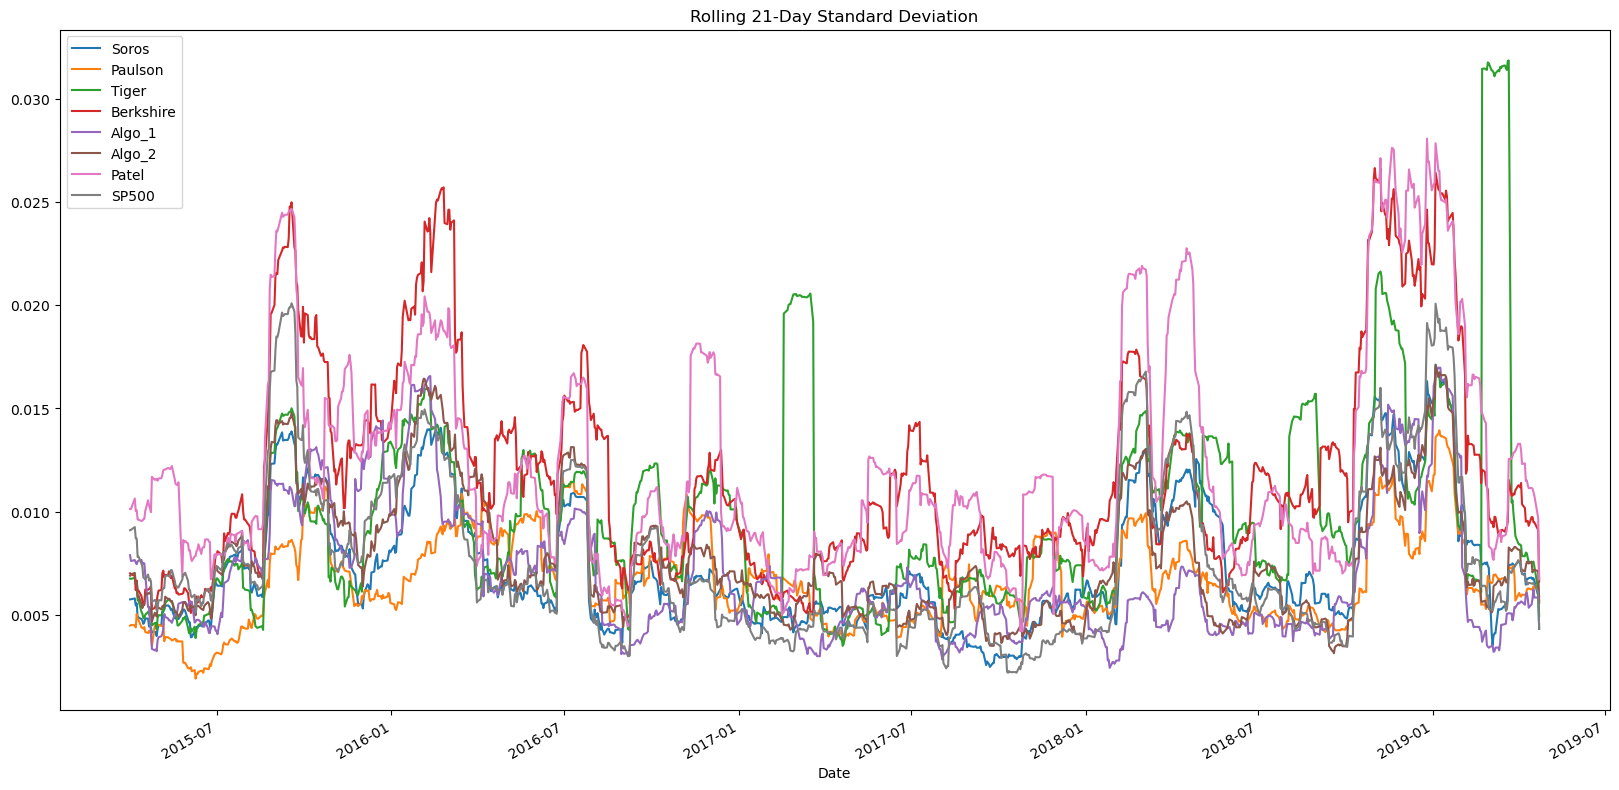

In [91]:
# Calculate rolling standard deviation
custom_analysis_21_df = port_daily_returns.rolling(window=21).std()
custom_analysis_21_df

# Plot rolling standard deviation
custom_analysis_21_df.plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')


### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation
correlation = port_daily_returns.corr()
correlation

Soros   Paulson     Tiger  Berkshire    Algo_1    Algo_2  \
Soros      1.000000  0.699961  0.561246   0.754385  0.321175  0.826869   
Paulson    0.699961  1.000000  0.434551   0.545465  0.268692  0.678214   
Tiger      0.561246  0.434551  1.000000   0.424465  0.164384  0.507414   
Berkshire  0.754385  0.545465  0.424465   1.000000  0.291912  0.688112   
Algo_1     0.321175  0.268692  0.164384   0.291912  1.000000  0.288214   
Algo_2     0.826869  0.678214  0.507414   0.688112  0.288214  1.000000   
Patel      0.734258  0.549760  0.496487   0.741482  0.239425  0.732582   
SP500      0.837908  0.669612  0.624023   0.751297  0.279366  0.858828   

              Patel     SP500  
Soros      0.734258  0.837908  
Paulson    0.549760  0.669612  
Tiger      0.496487  0.624023  
Berkshire  0.741482  0.751297  
Algo_1     0.239425  0.279366  
Algo_2     0.732582  0.858828  
Patel      1.000000  0.846459  
SP500      0.846459  1.000000

Algo_1       0.356646
Tiger        0.526571
Paulson      0.605782
Berkshire    0.649640
Patel        0.667557
Algo_2       0.697529
Soros        0.716975
SP500        0.733437
dtype: float64

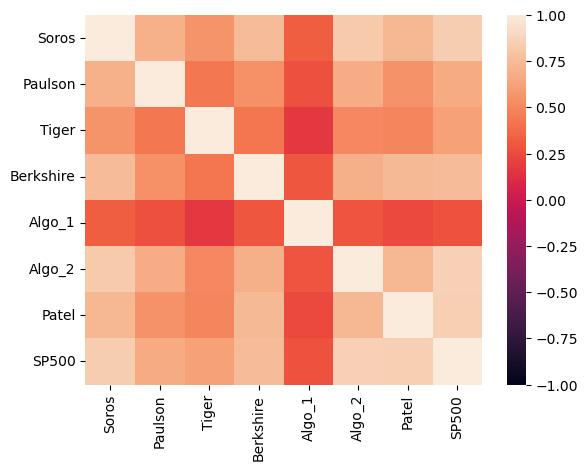

In [93]:
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation.mean().sort_values()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [94]:
# Calculate and plot Beta

rolling_patel_covariance = port_daily_returns["Patel"].rolling(window=60).cov(macro_analysis_df['SP500'])

rolling_patel_beta = rolling_patel_covariance / rolling_variance



<AxesSubplot:title={'center':'Rolling 60-Day Beta of Patel'}, xlabel='Date'>

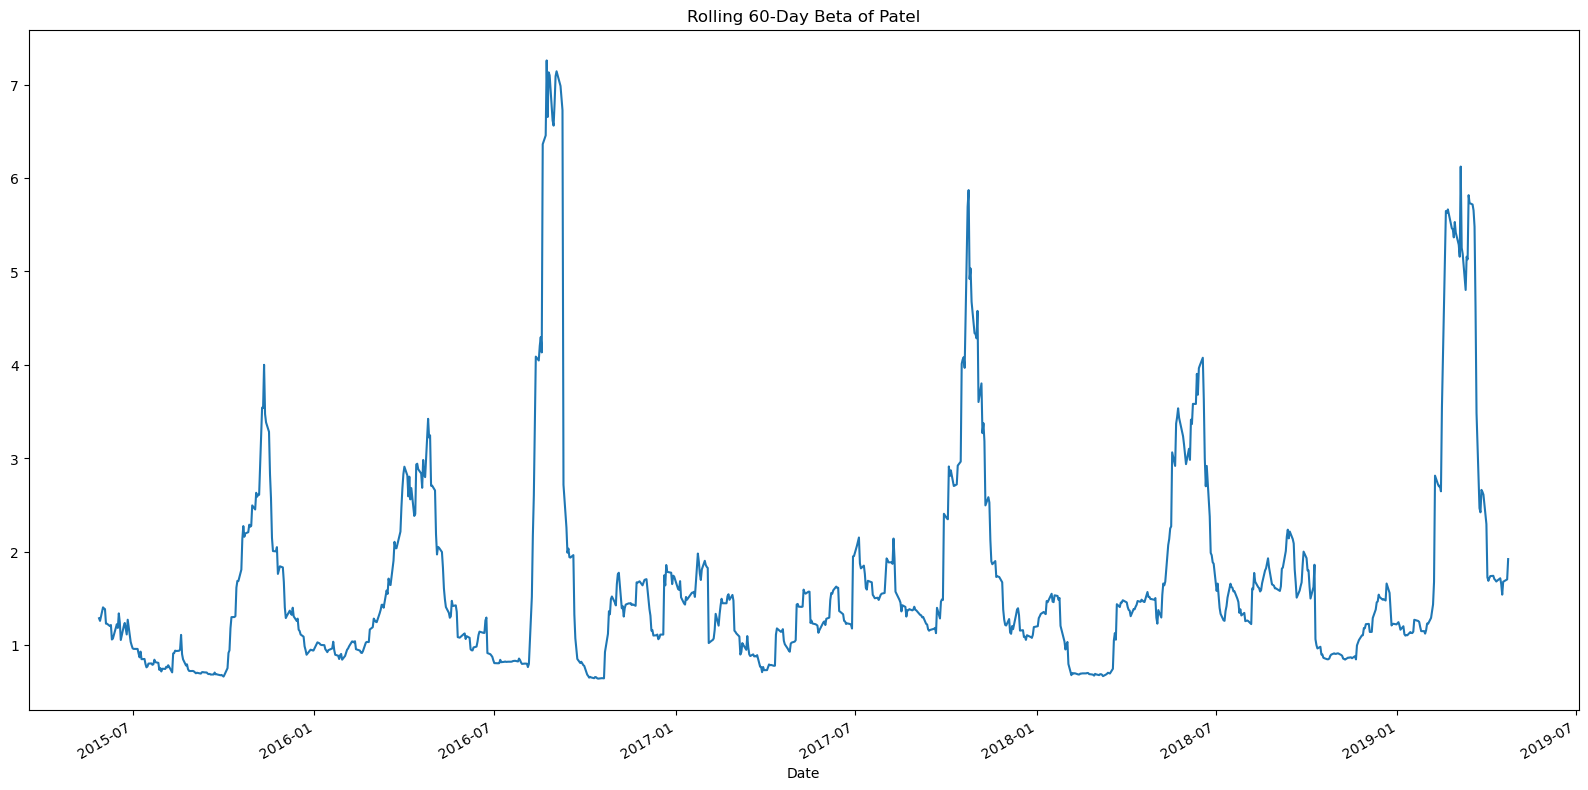

In [95]:
# Plot Beta
rolling_patel_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Patel")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [96]:
# Calculate Annualized Sharpe Ratios
sharpe_r2 = ((port_daily_returns.mean())*252) / ((port_daily_returns.std())*np.sqrt(252))
sharpe_r2 

Soros        0.359034
Paulson     -0.473108
Tiger       -0.120425
Berkshire    0.629941
Algo_1       1.383268
Algo_2       0.503342
Patel        1.406076
SP500        0.656761
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

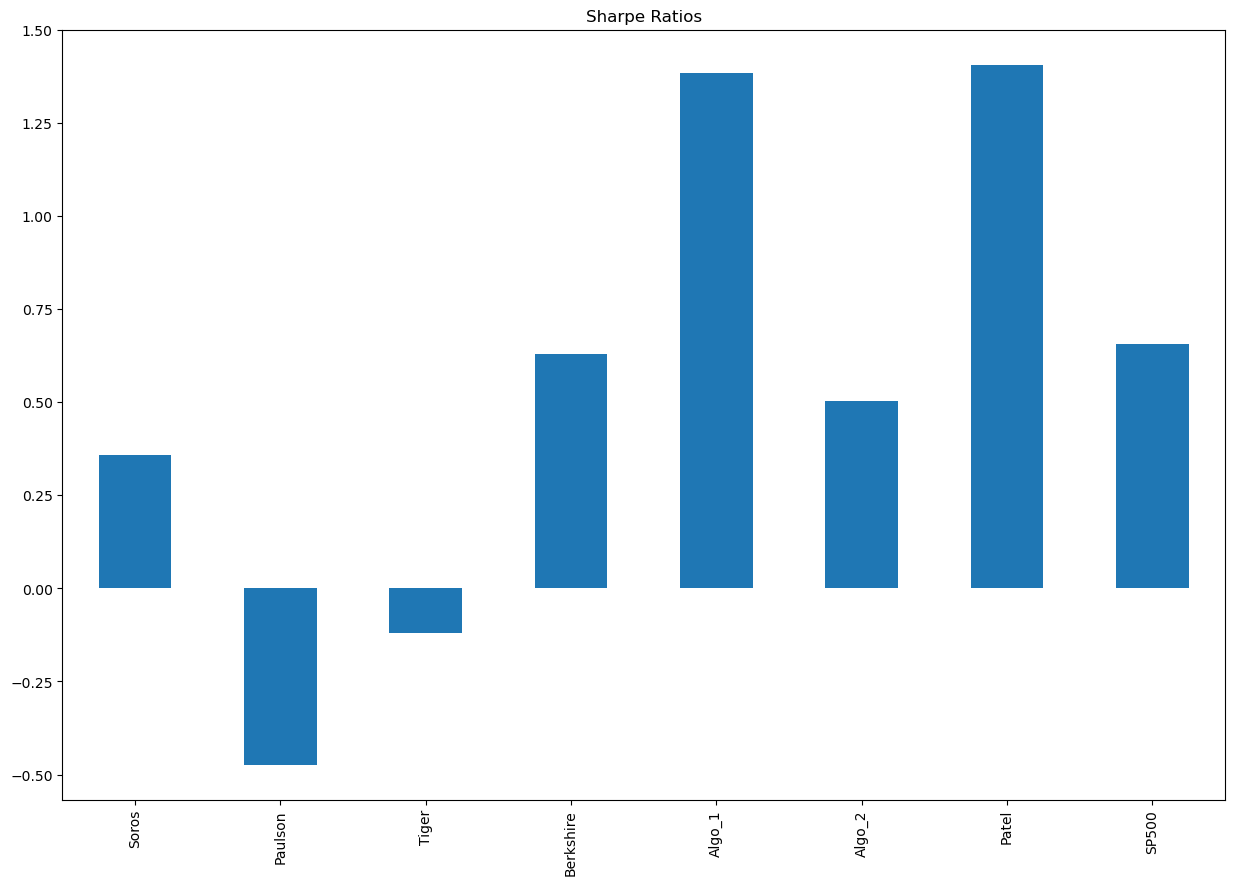

In [97]:
# Visualize the sharpe ratios as a bar plot
sharpe_r2.plot(kind='bar', figsize=(15,10), title='Sharpe Ratios')

### Portfolio Analysis Summary - Part 2:


* The new Patel portfolio of equal weighted stocks: NVDA, COF, ORCL, AMZN and MSFT beat the Algo 1 portfolio when measuring the sharpe ratio

* Patel portfolio has a 1.40 sharpe ratio vs. 1.38 for the Algo 1 portfolio, both portfolios beat the S&P 500

1. Patel
2. Algo 1
3. Berkshire
4. Algo 2
5. Soros
6. Tiger
7. Paulson
